## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [19]:
data = pd.read_csv('ObesityDataSet.csv')
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Descrevendo o conjunto de dados

In [20]:
# 1
columns = data.columns
N = data.shape[0] # amostras
D = data.shape[1] - 1  # preditores
L = data['NObeyesdad'].nunique() # classes
class_distribution = data['NObeyesdad'].value_counts() # distribuição das classes

In [10]:
print(f'Número de amostras (N): {N}')

Número de amostras (N): 2111


In [11]:
# preditores gráfico
print(f'Número de preditores (D): {D}')

Número de preditores (D): 16


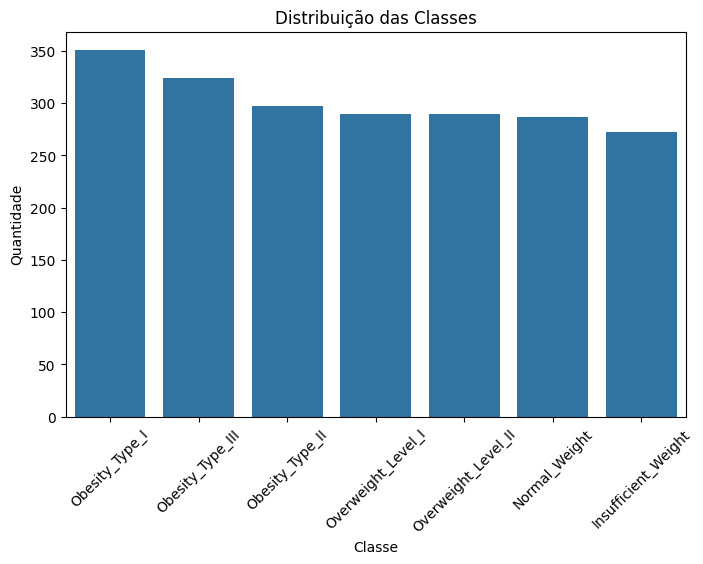

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='NObeyesdad', data=data, order=class_distribution.index)
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.savefig("distribuicao-classes.png", dpi=300)
plt.show()

# Dados Faltantes


In [12]:
# Verifica valores ausentes em cada coluna
missing_values = data.isnull().sum()

# Mostra apenas colunas que possuem valores faltantes
missing_values = missing_values[missing_values > 0]

print(" Valores faltantes por variável:")
print(missing_values)

 Valores faltantes por variável:
Series([], dtype: int64)


# Análise Monovariada

In [13]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

print("Variáveis numéricas:")
print(numeric_cols)

Variáveis numéricas:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


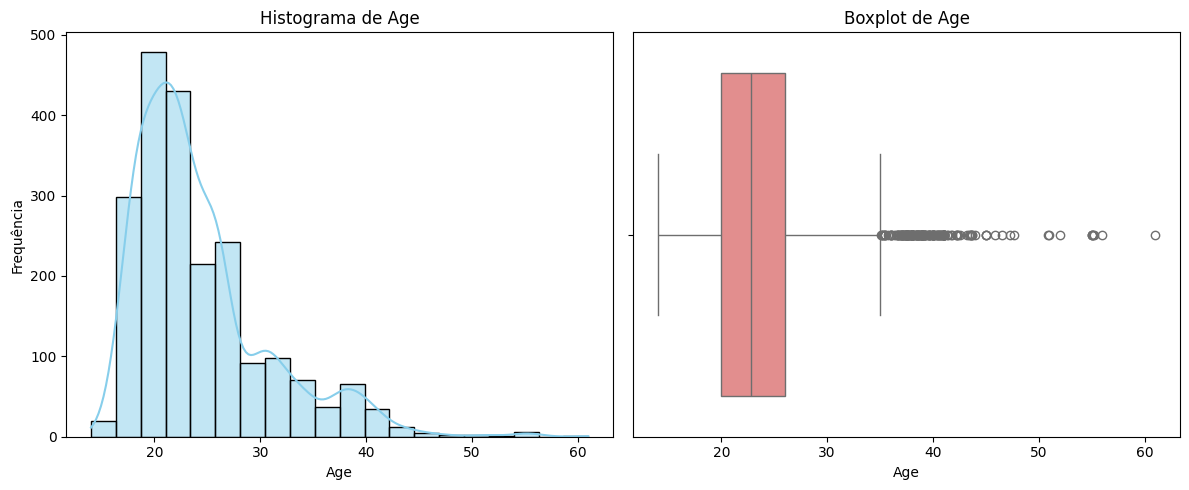

📈 Age
  Média (μ): 24.31
  Desvio padrão (σ): 6.35
  Assimetria (γ): 1.53
----------------------------------------


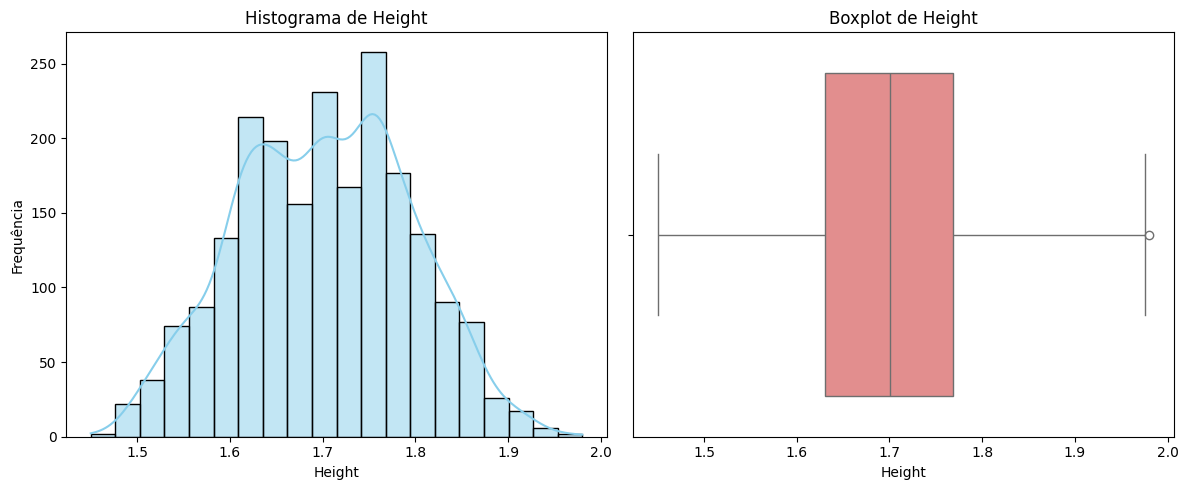

📈 Height
  Média (μ): 1.70
  Desvio padrão (σ): 0.09
  Assimetria (γ): -0.01
----------------------------------------


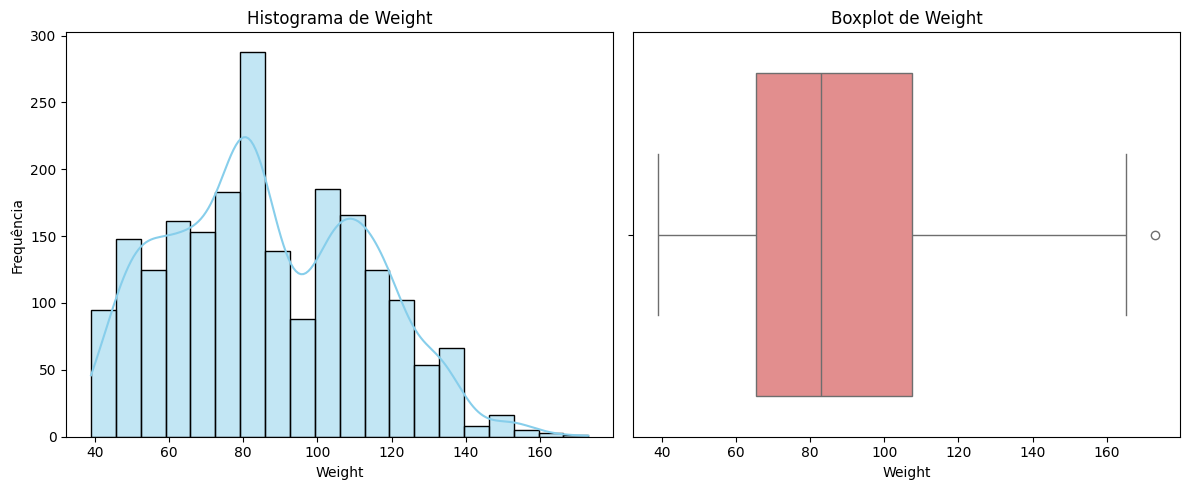

📈 Weight
  Média (μ): 86.59
  Desvio padrão (σ): 26.19
  Assimetria (γ): 0.26
----------------------------------------


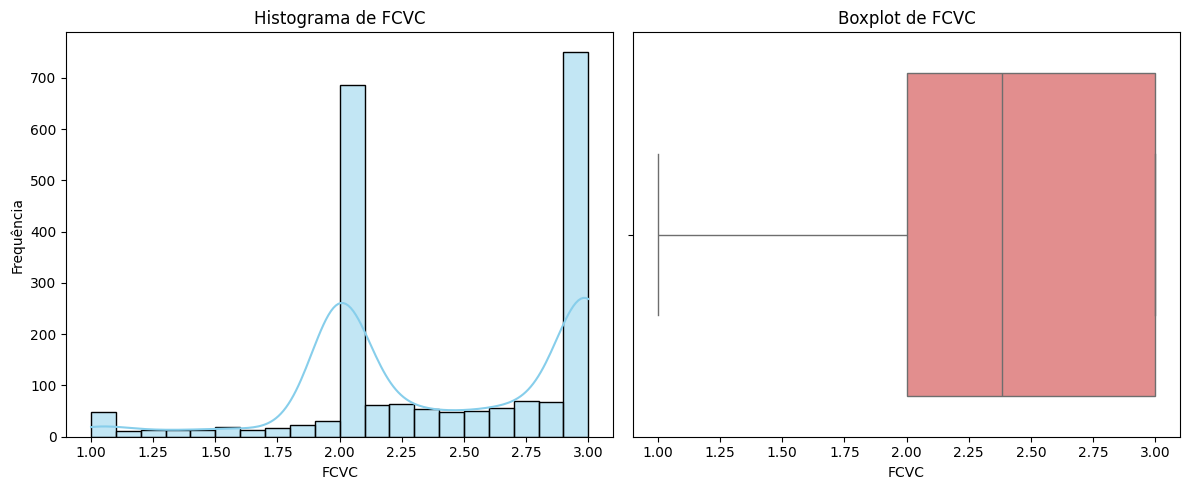

📈 FCVC
  Média (μ): 2.42
  Desvio padrão (σ): 0.53
  Assimetria (γ): -0.43
----------------------------------------


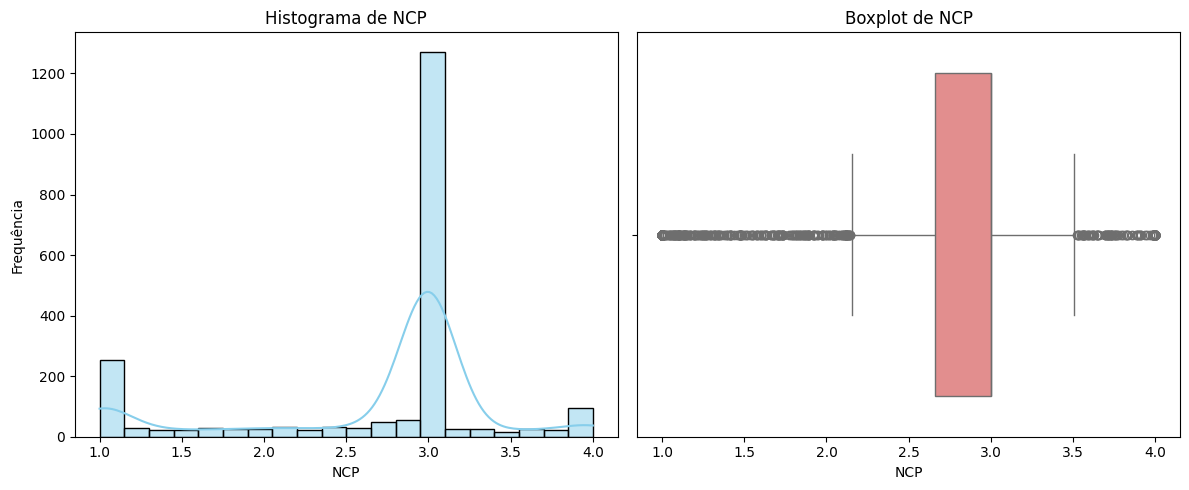

📈 NCP
  Média (μ): 2.69
  Desvio padrão (σ): 0.78
  Assimetria (γ): -1.11
----------------------------------------


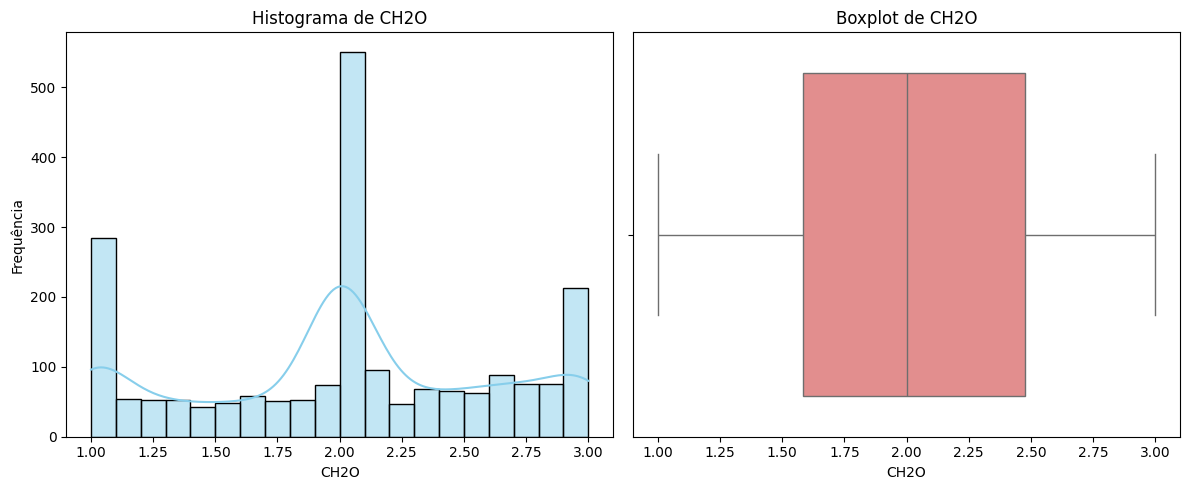

📈 CH2O
  Média (μ): 2.01
  Desvio padrão (σ): 0.61
  Assimetria (γ): -0.10
----------------------------------------


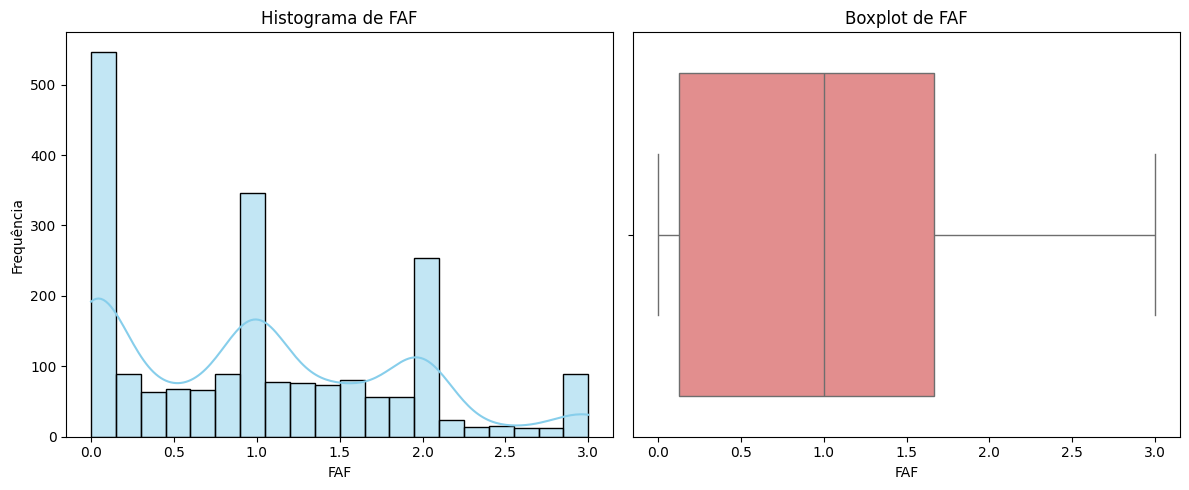

📈 FAF
  Média (μ): 1.01
  Desvio padrão (σ): 0.85
  Assimetria (γ): 0.50
----------------------------------------


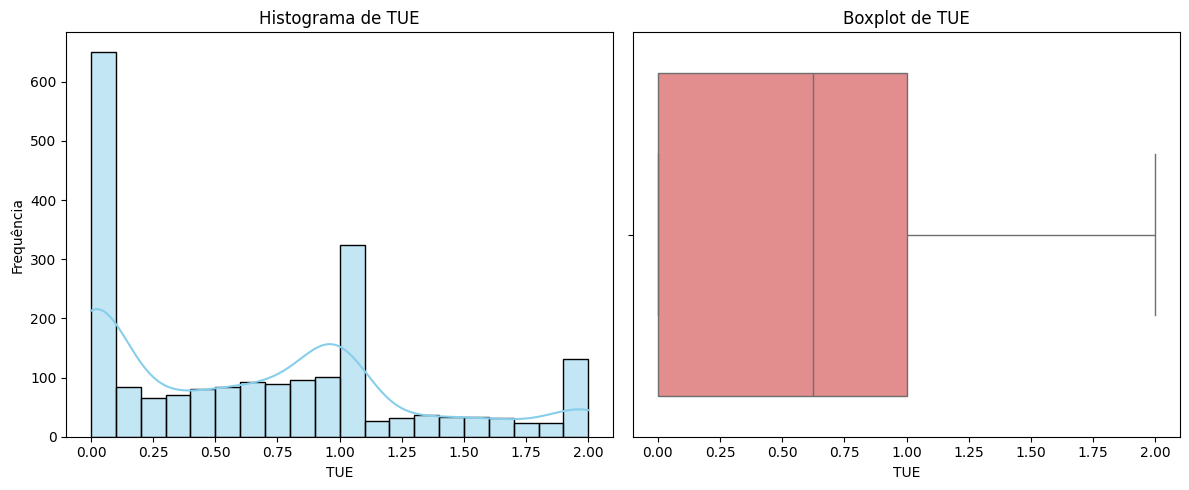

📈 TUE
  Média (μ): 0.66
  Desvio padrão (σ): 0.61
  Assimetria (γ): 0.62
----------------------------------------


In [ ]:
# Cria o conjunto de figuras para cada variável numérica
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Subplot 1: histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Subplot 2: boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

    # Calculo das estatísticas
    mean = data[col].mean()
    std = data[col].std()
    skewness = skew(data[col].dropna())

    print(f"{col}")
    print(f"  Média (μ): {mean:.2f}")
    print(f"  Desvio padrão (σ): {std:.2f}")
    print(f"  Assimetria (γ): {skewness:.2f}")
    print("-"*40)


# Análise Monovariada Condicional





========================= ANÁLISE DA VARIÁVEL: AGE =========================

--- Analisando 'Age' para a Classe: Insufficient_Weight ---


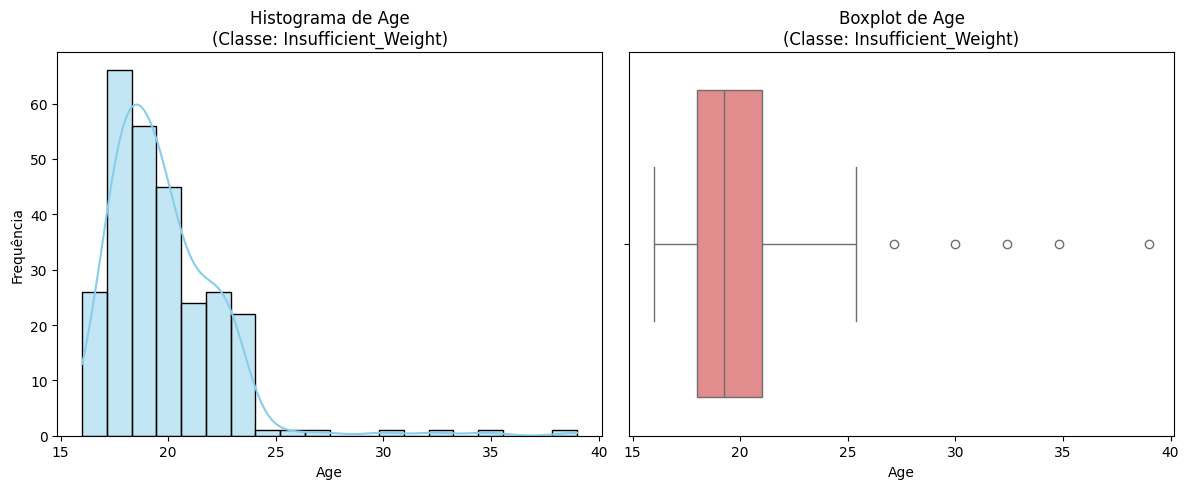

📈 Estatísticas de 'Age' para a classe 'Insufficient_Weight':
   Média (μ): 19.78
   Desvio padrão (σ): 2.67
   Assimetria (γ): 2.76
--------------------------------------------------

--- Analisando 'Age' para a Classe: Normal_Weight ---


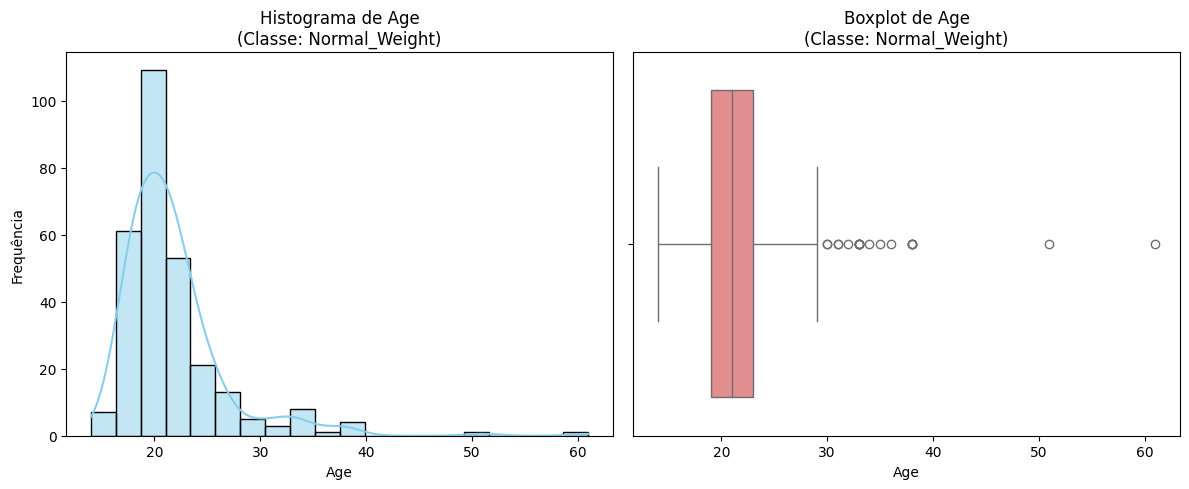

📈 Estatísticas de 'Age' para a classe 'Normal_Weight':
   Média (μ): 21.74
   Desvio padrão (σ): 5.10
   Assimetria (γ): 3.13
--------------------------------------------------

--- Analisando 'Age' para a Classe: Obesity_Type_I ---


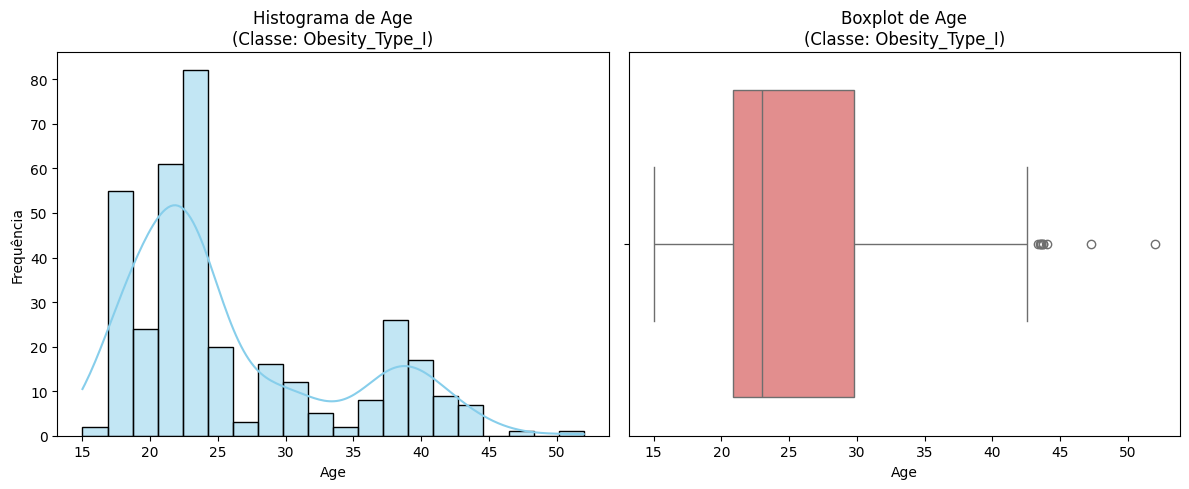

📈 Estatísticas de 'Age' para a classe 'Obesity_Type_I':
   Média (μ): 25.88
   Desvio padrão (σ): 7.76
   Assimetria (γ): 1.02
--------------------------------------------------

--- Analisando 'Age' para a Classe: Obesity_Type_II ---


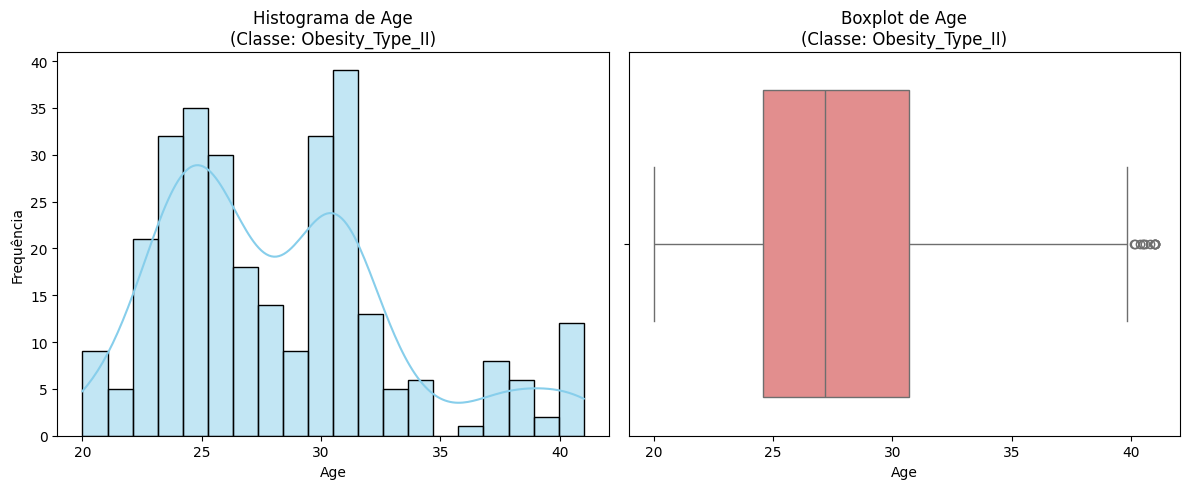

📈 Estatísticas de 'Age' para a classe 'Obesity_Type_II':
   Média (μ): 28.23
   Desvio padrão (σ): 4.87
   Assimetria (γ): 0.82
--------------------------------------------------

--- Analisando 'Age' para a Classe: Obesity_Type_III ---


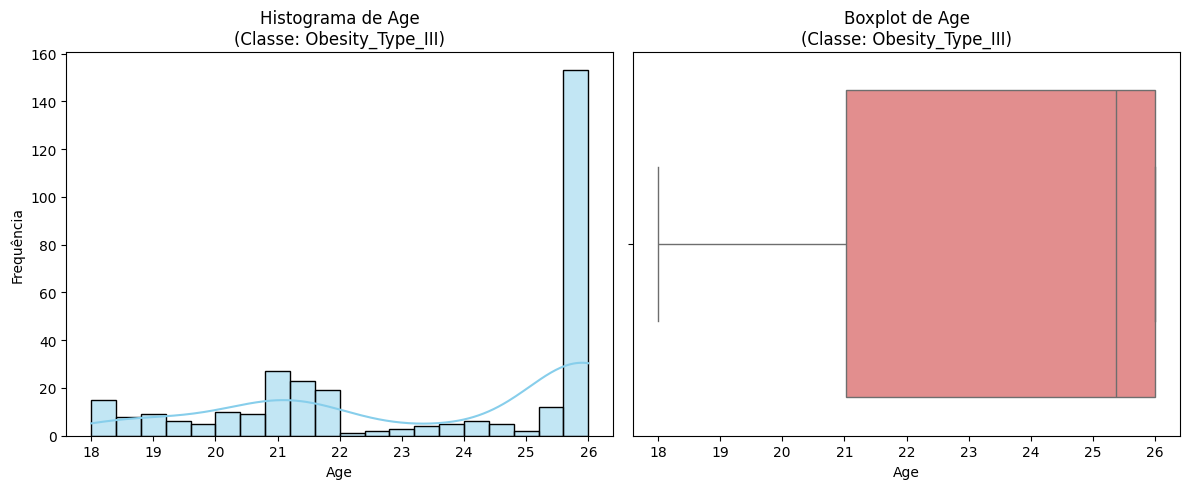

📈 Estatísticas de 'Age' para a classe 'Obesity_Type_III':
   Média (μ): 23.50
   Desvio padrão (σ): 2.76
   Assimetria (γ): -0.52
--------------------------------------------------

--- Analisando 'Age' para a Classe: Overweight_Level_I ---


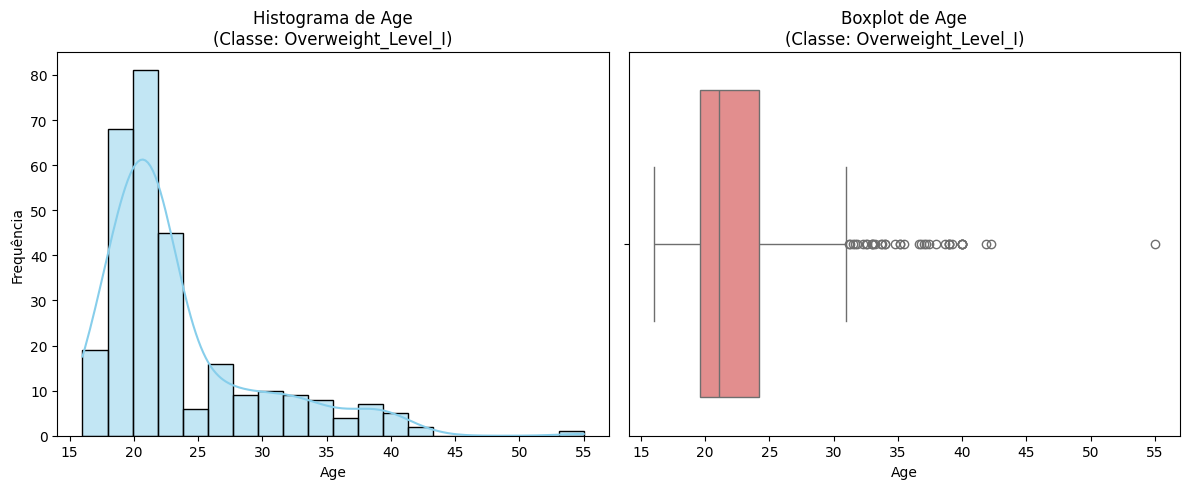

📈 Estatísticas de 'Age' para a classe 'Overweight_Level_I':
   Média (μ): 23.42
   Desvio padrão (σ): 6.13
   Assimetria (γ): 1.69
--------------------------------------------------

--- Analisando 'Age' para a Classe: Overweight_Level_II ---


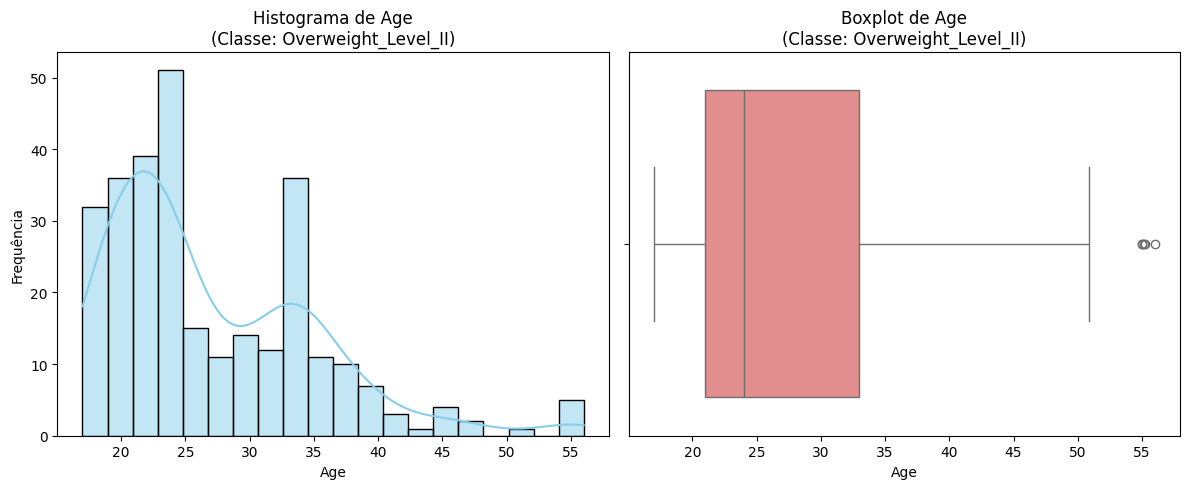

📈 Estatísticas de 'Age' para a classe 'Overweight_Level_II':
   Média (μ): 27.00
   Desvio padrão (σ): 8.06
   Assimetria (γ): 1.18
--------------------------------------------------


========================= ANÁLISE DA VARIÁVEL: HEIGHT =========================

--- Analisando 'Height' para a Classe: Insufficient_Weight ---


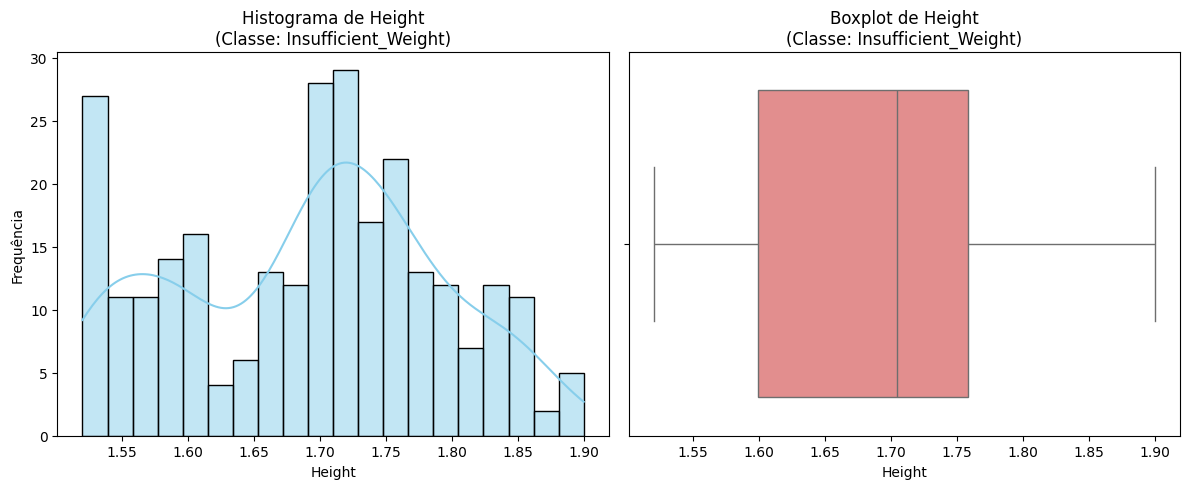

📈 Estatísticas de 'Height' para a classe 'Insufficient_Weight':
   Média (μ): 1.69
   Desvio padrão (σ): 0.10
   Assimetria (γ): -0.10
--------------------------------------------------

--- Analisando 'Height' para a Classe: Normal_Weight ---


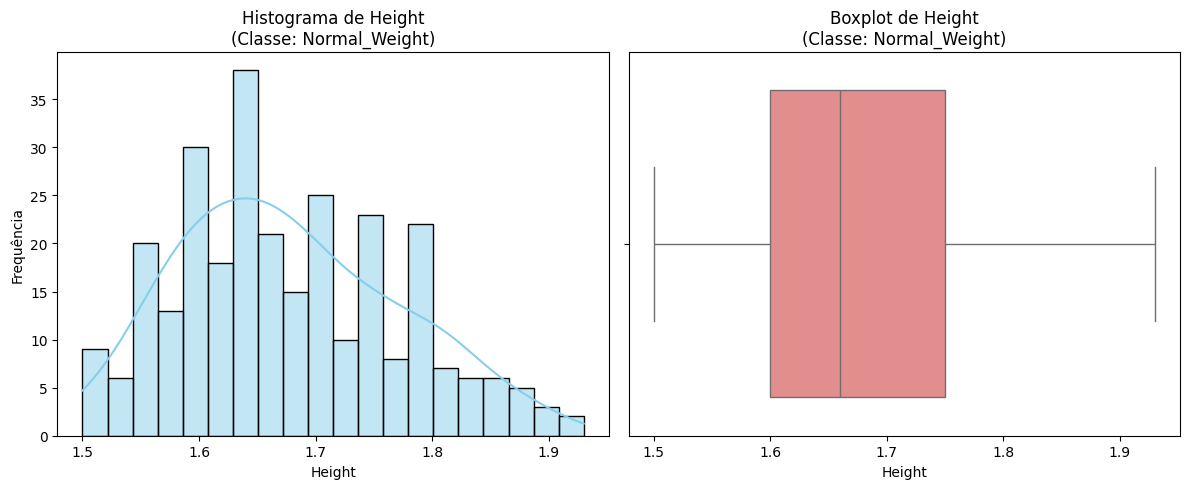

📈 Estatísticas de 'Height' para a classe 'Normal_Weight':
   Média (μ): 1.68
   Desvio padrão (σ): 0.09
   Assimetria (γ): 0.37
--------------------------------------------------

--- Analisando 'Height' para a Classe: Obesity_Type_I ---


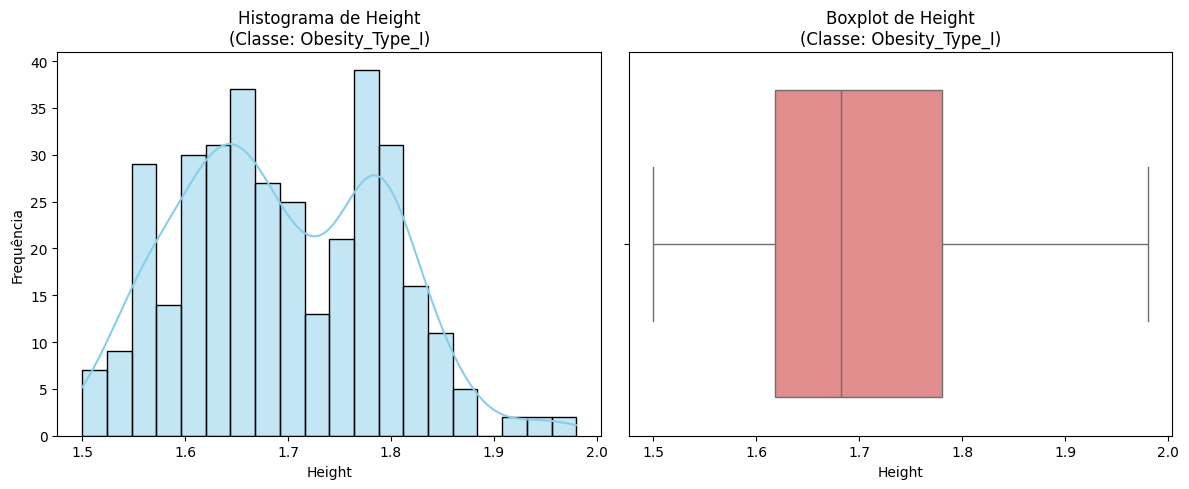

📈 Estatísticas de 'Height' para a classe 'Obesity_Type_I':
   Média (μ): 1.69
   Desvio padrão (σ): 0.10
   Assimetria (γ): 0.22
--------------------------------------------------

--- Analisando 'Height' para a Classe: Obesity_Type_II ---


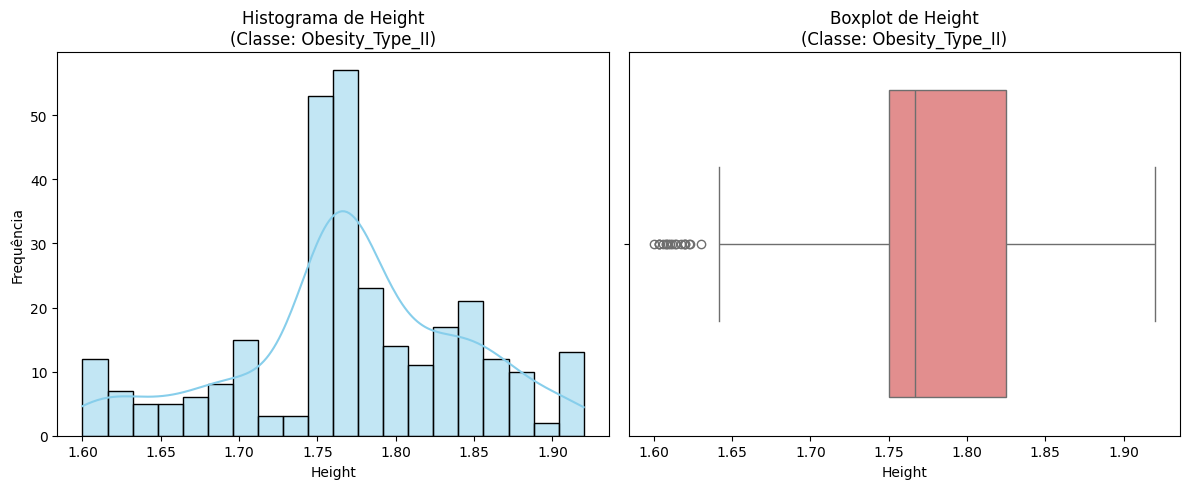

📈 Estatísticas de 'Height' para a classe 'Obesity_Type_II':
   Média (μ): 1.77
   Desvio padrão (σ): 0.07
   Assimetria (γ): -0.32
--------------------------------------------------

--- Analisando 'Height' para a Classe: Obesity_Type_III ---


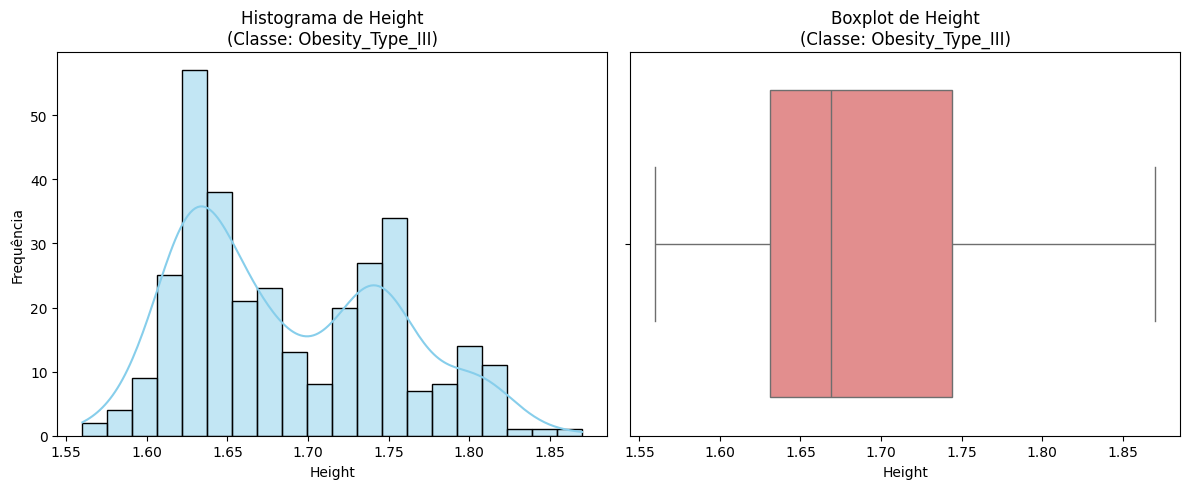

📈 Estatísticas de 'Height' para a classe 'Obesity_Type_III':
   Média (μ): 1.69
   Desvio padrão (σ): 0.07
   Assimetria (γ): 0.44
--------------------------------------------------

--- Analisando 'Height' para a Classe: Overweight_Level_I ---


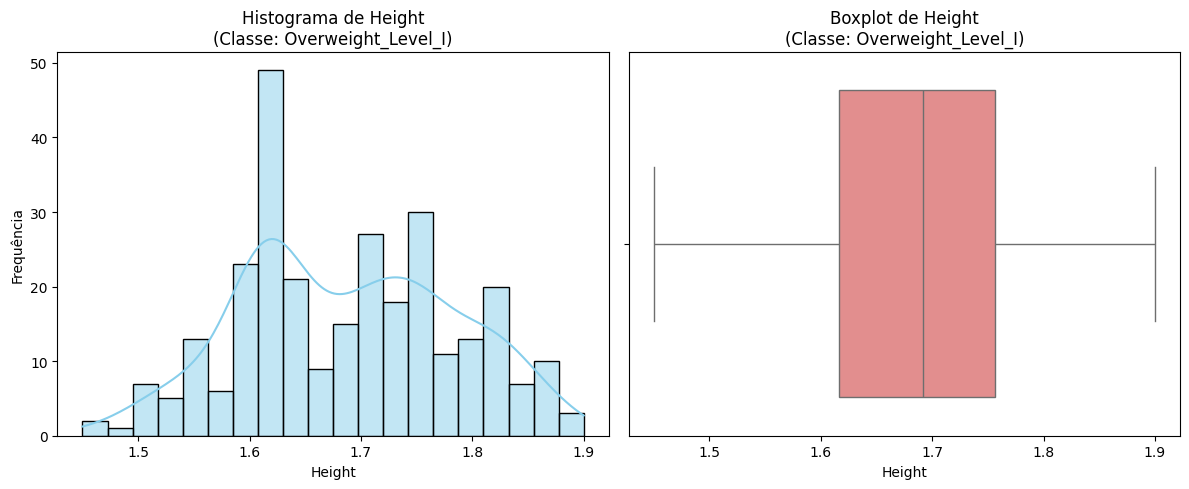

📈 Estatísticas de 'Height' para a classe 'Overweight_Level_I':
   Média (μ): 1.69
   Desvio padrão (σ): 0.10
   Assimetria (γ): 0.04
--------------------------------------------------

--- Analisando 'Height' para a Classe: Overweight_Level_II ---


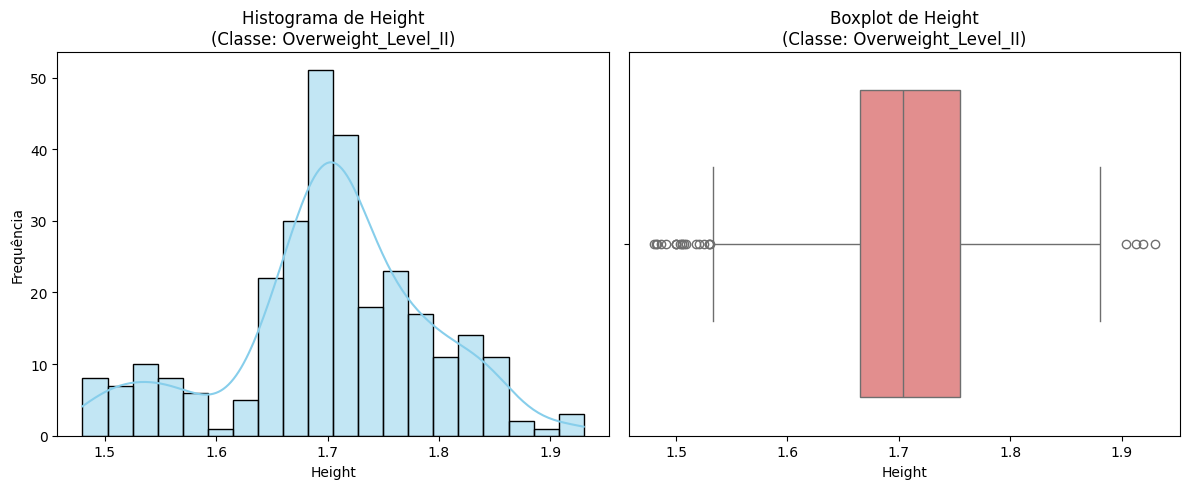

📈 Estatísticas de 'Height' para a classe 'Overweight_Level_II':
   Média (μ): 1.70
   Desvio padrão (σ): 0.09
   Assimetria (γ): -0.40
--------------------------------------------------


========================= ANÁLISE DA VARIÁVEL: WEIGHT =========================

--- Analisando 'Weight' para a Classe: Insufficient_Weight ---


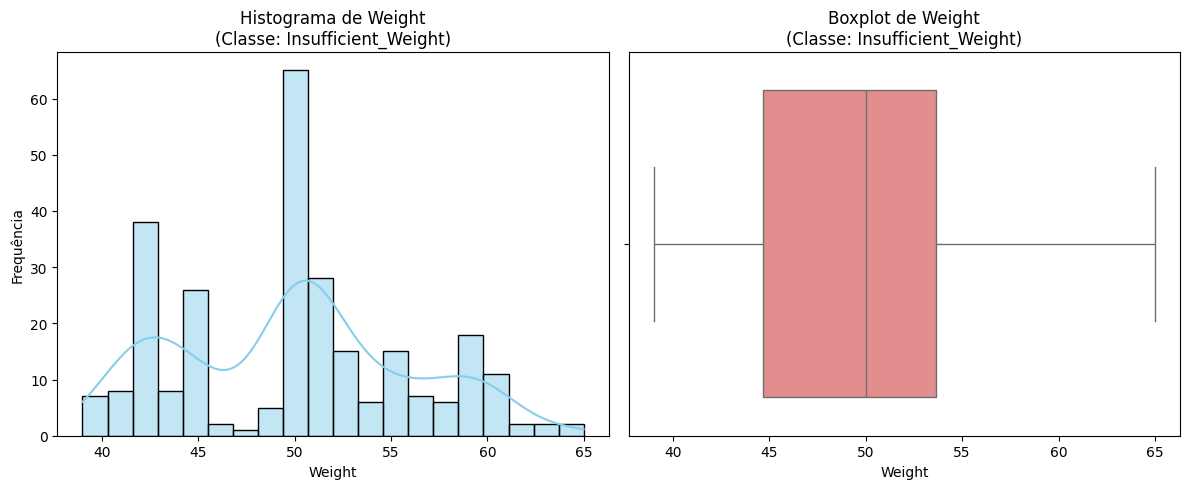

📈 Estatísticas de 'Weight' para a classe 'Insufficient_Weight':
   Média (μ): 49.91
   Desvio padrão (σ): 6.01
   Assimetria (γ): 0.19
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Normal_Weight ---


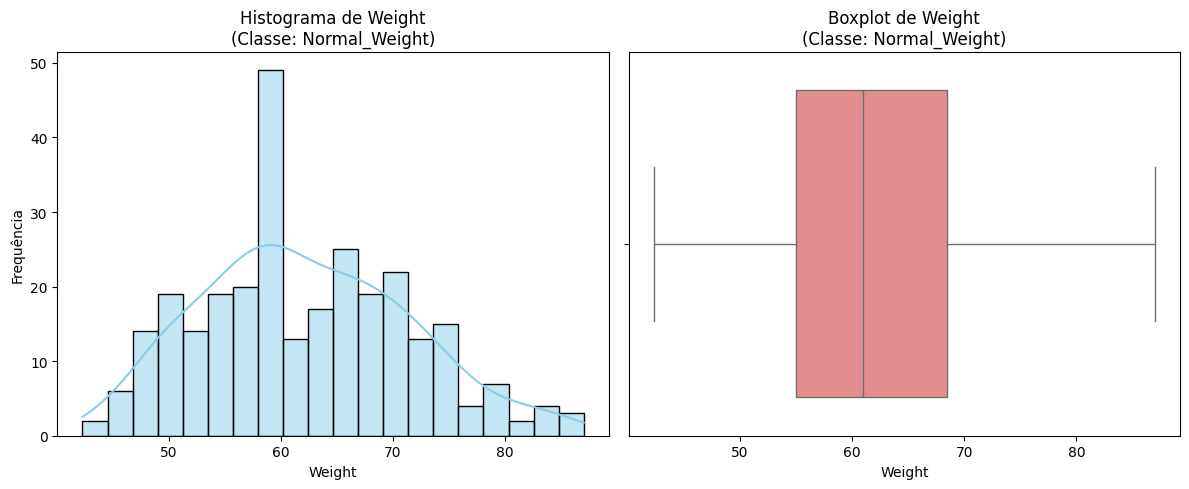

📈 Estatísticas de 'Weight' para a classe 'Normal_Weight':
   Média (μ): 62.16
   Desvio padrão (σ): 9.30
   Assimetria (γ): 0.30
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Obesity_Type_I ---


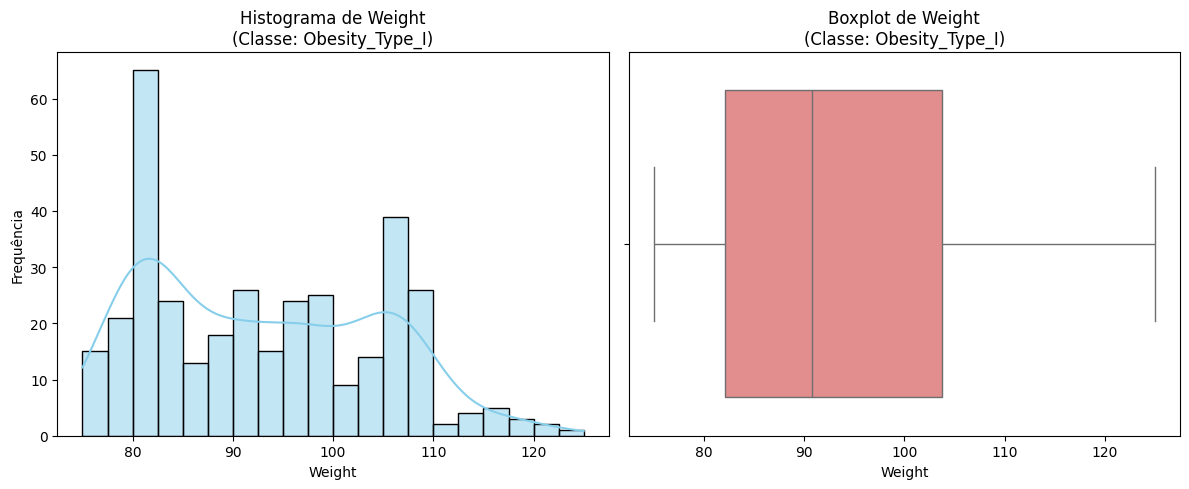

📈 Estatísticas de 'Weight' para a classe 'Obesity_Type_I':
   Média (μ): 92.87
   Desvio padrão (σ): 11.49
   Assimetria (γ): 0.35
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Obesity_Type_II ---


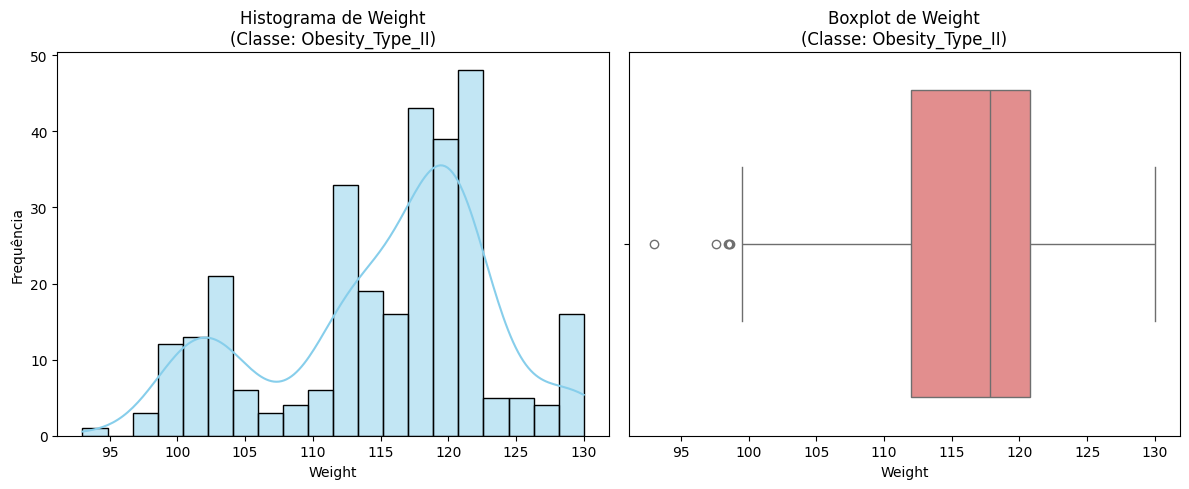

📈 Estatísticas de 'Weight' para a classe 'Obesity_Type_II':
   Média (μ): 115.31
   Desvio padrão (σ): 8.02
   Assimetria (γ): -0.55
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Obesity_Type_III ---


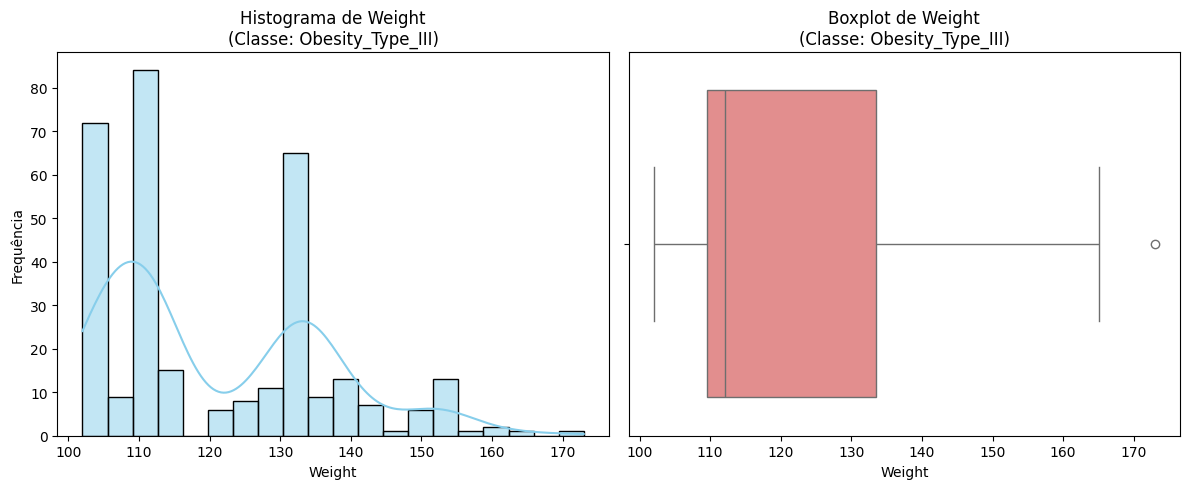

📈 Estatísticas de 'Weight' para a classe 'Obesity_Type_III':
   Média (μ): 120.94
   Desvio padrão (σ): 15.53
   Assimetria (γ): 0.69
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Overweight_Level_I ---


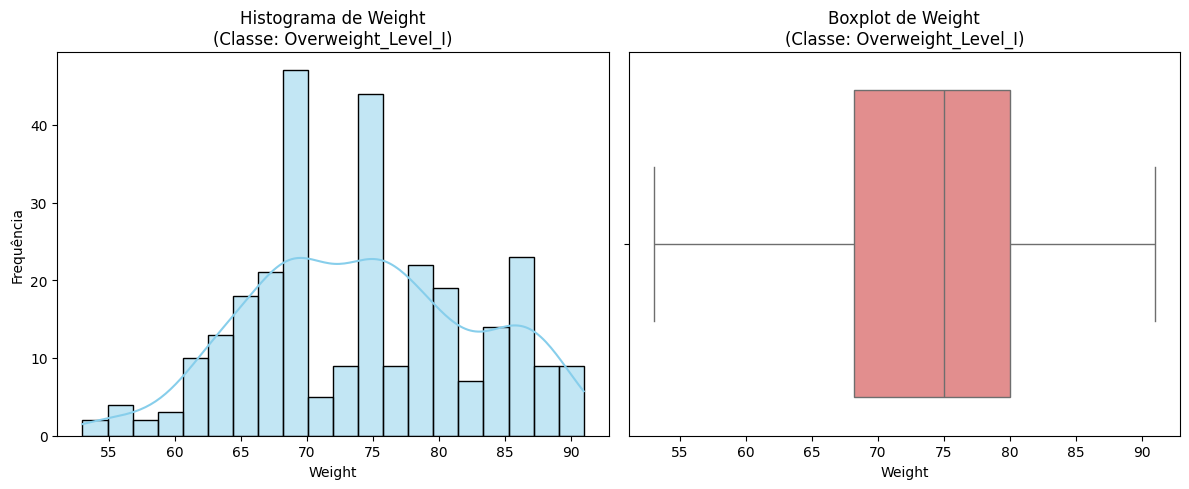

📈 Estatísticas de 'Weight' para a classe 'Overweight_Level_I':
   Média (μ): 74.27
   Desvio padrão (σ): 8.47
   Assimetria (γ): 0.01
--------------------------------------------------

--- Analisando 'Weight' para a Classe: Overweight_Level_II ---


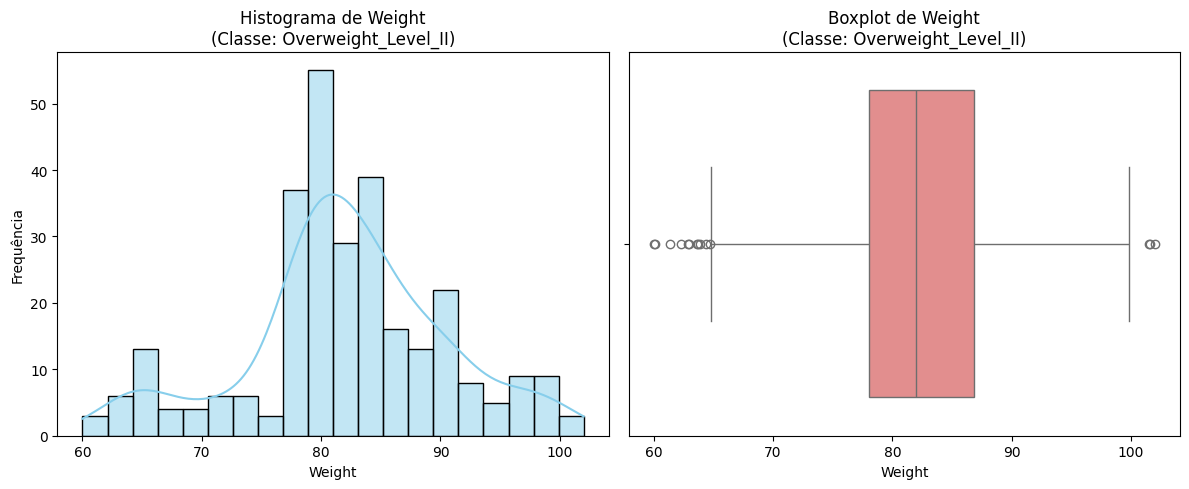

📈 Estatísticas de 'Weight' para a classe 'Overweight_Level_II':
   Média (μ): 82.09
   Desvio padrão (σ): 8.45
   Assimetria (γ): -0.23
--------------------------------------------------


========================= ANÁLISE DA VARIÁVEL: FCVC =========================

--- Analisando 'FCVC' para a Classe: Insufficient_Weight ---


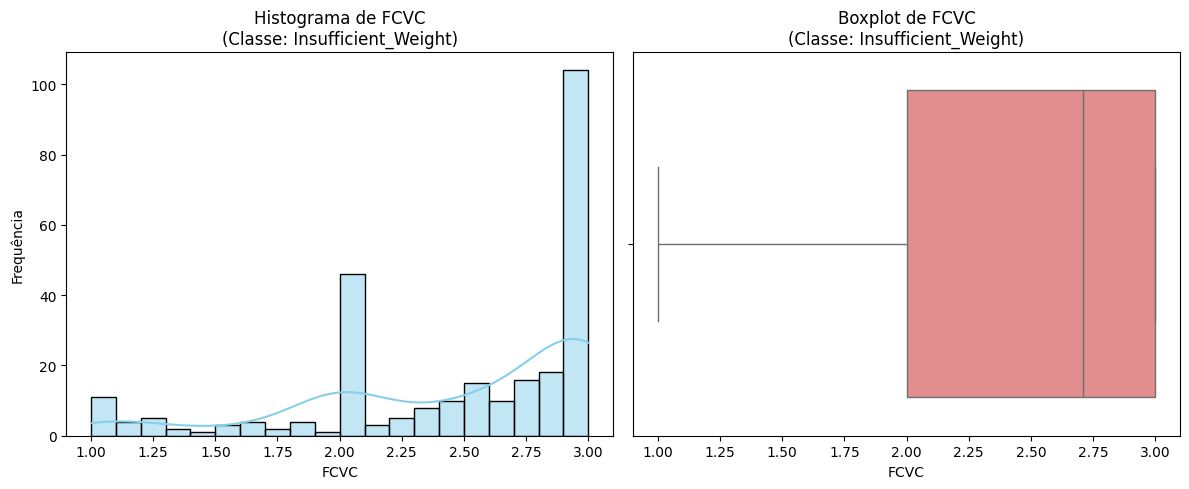

📈 Estatísticas de 'FCVC' para a classe 'Insufficient_Weight':
   Média (μ): 2.48
   Desvio padrão (σ): 0.58
   Assimetria (γ): -1.01
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Normal_Weight ---


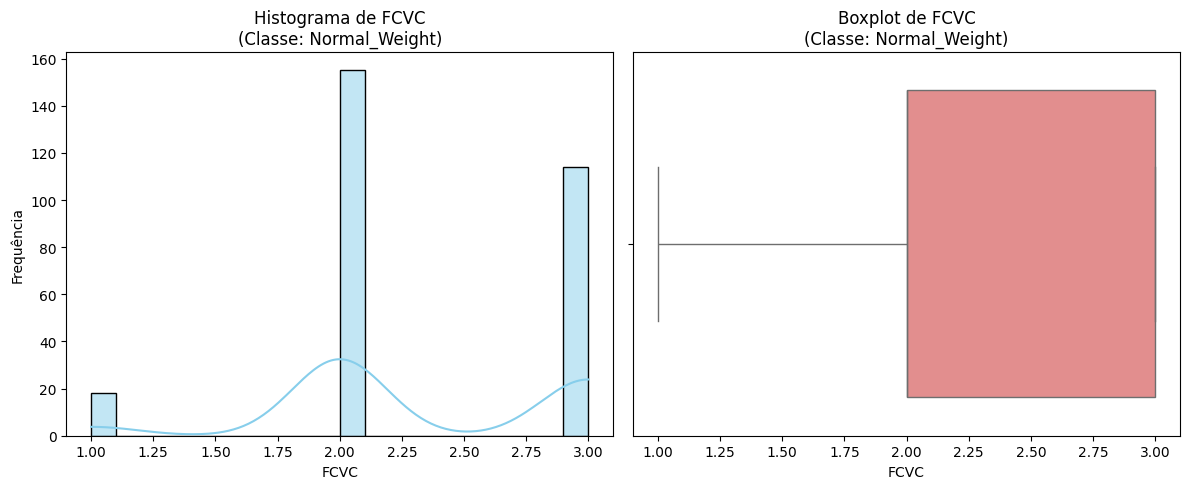

📈 Estatísticas de 'FCVC' para a classe 'Normal_Weight':
   Média (μ): 2.33
   Desvio padrão (σ): 0.59
   Assimetria (γ): -0.25
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Obesity_Type_I ---


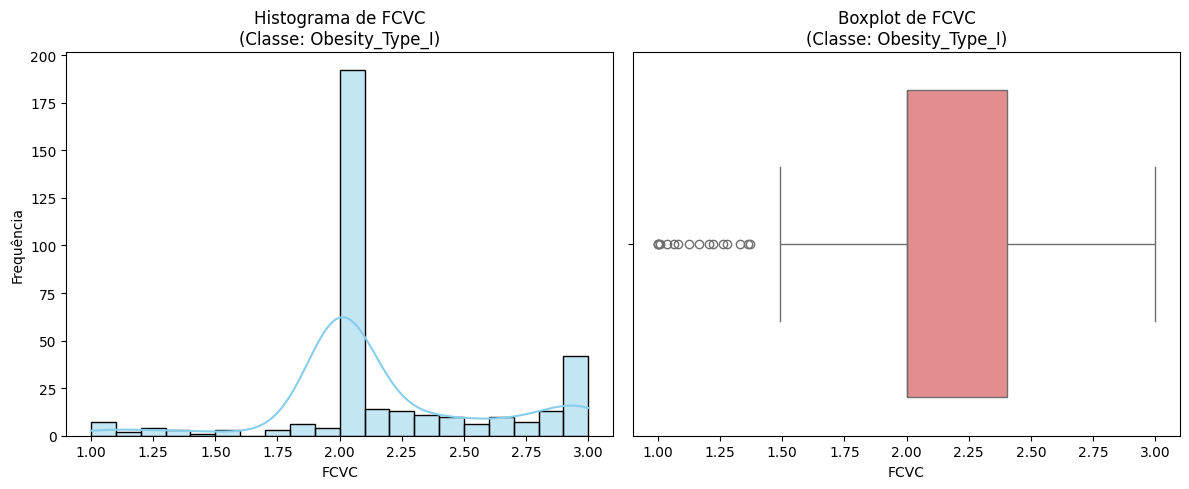

📈 Estatísticas de 'FCVC' para a classe 'Obesity_Type_I':
   Média (μ): 2.19
   Desvio padrão (σ): 0.43
   Assimetria (γ): 0.23
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Obesity_Type_II ---


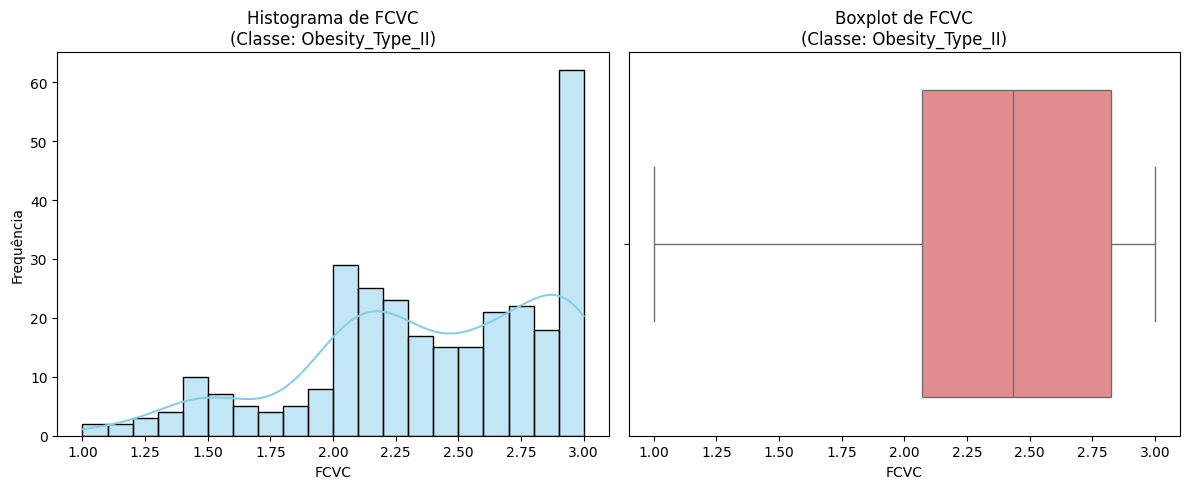

📈 Estatísticas de 'FCVC' para a classe 'Obesity_Type_II':
   Média (μ): 2.39
   Desvio padrão (σ): 0.49
   Assimetria (γ): -0.59
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Obesity_Type_III ---


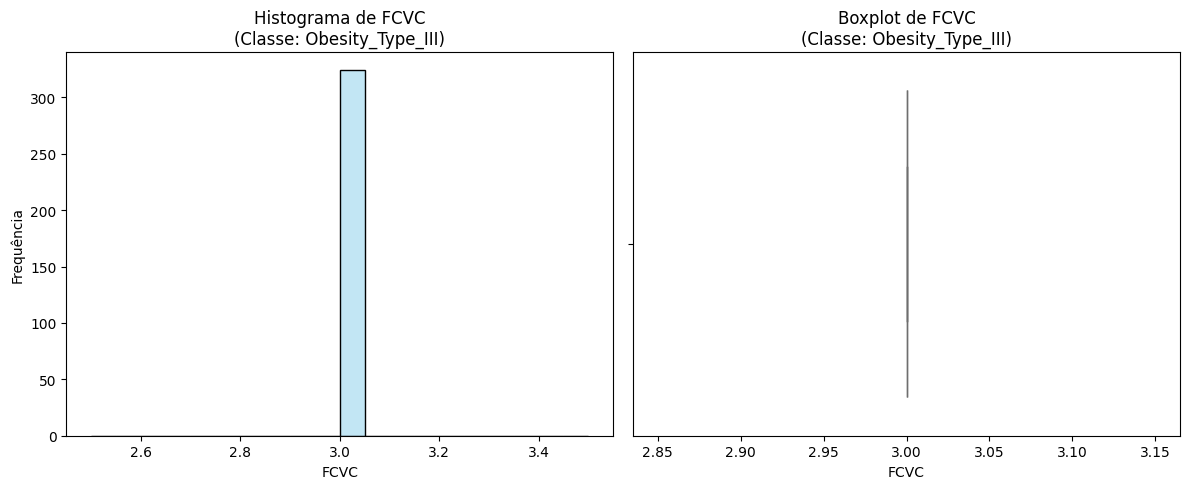

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\3870966219.py:44: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(subset_data[col].dropna())


📈 Estatísticas de 'FCVC' para a classe 'Obesity_Type_III':
   Média (μ): 3.00
   Desvio padrão (σ): 0.00
   Assimetria (γ): nan
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Overweight_Level_I ---


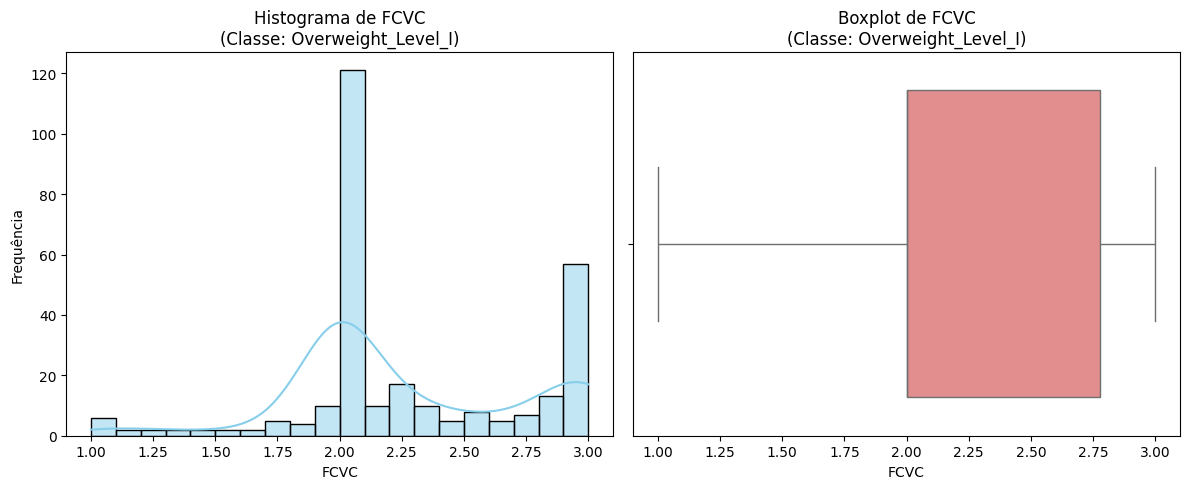

📈 Estatísticas de 'FCVC' para a classe 'Overweight_Level_I':
   Média (μ): 2.26
   Desvio padrão (σ): 0.48
   Assimetria (γ): 0.05
--------------------------------------------------

--- Analisando 'FCVC' para a Classe: Overweight_Level_II ---


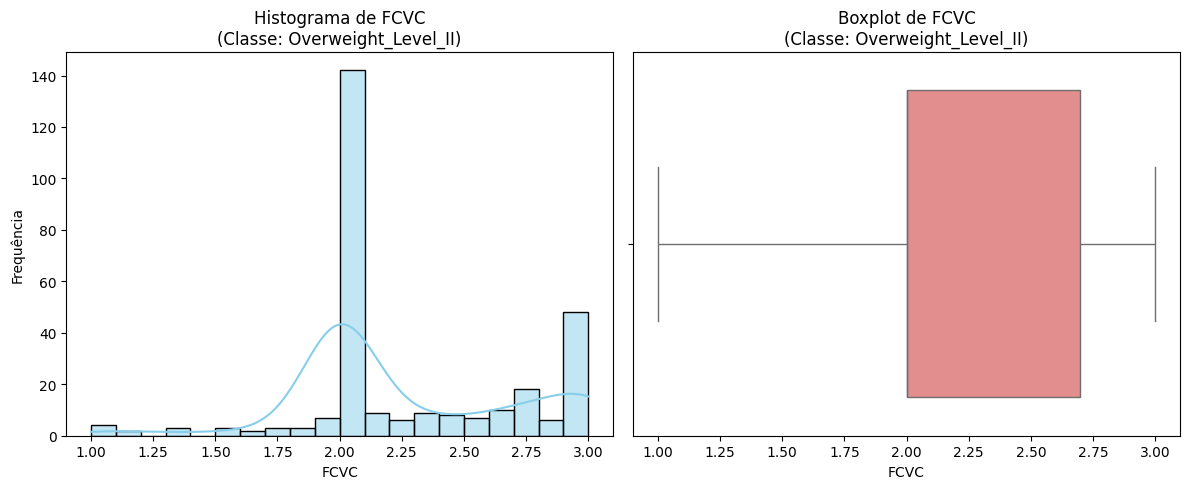

📈 Estatísticas de 'FCVC' para a classe 'Overweight_Level_II':
   Média (μ): 2.26
   Desvio padrão (σ): 0.45
   Assimetria (γ): 0.19
--------------------------------------------------


========================= ANÁLISE DA VARIÁVEL: NCP =========================

--- Analisando 'NCP' para a Classe: Insufficient_Weight ---


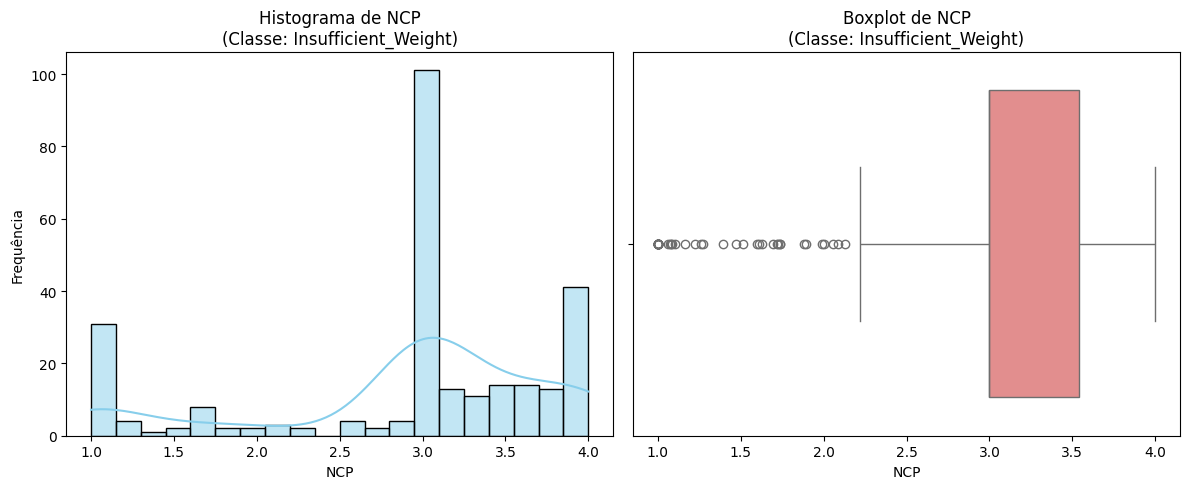

📈 Estatísticas de 'NCP' para a classe 'Insufficient_Weight':
   Média (μ): 2.91
   Desvio padrão (σ): 0.90
   Assimetria (γ): -0.99
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Normal_Weight ---


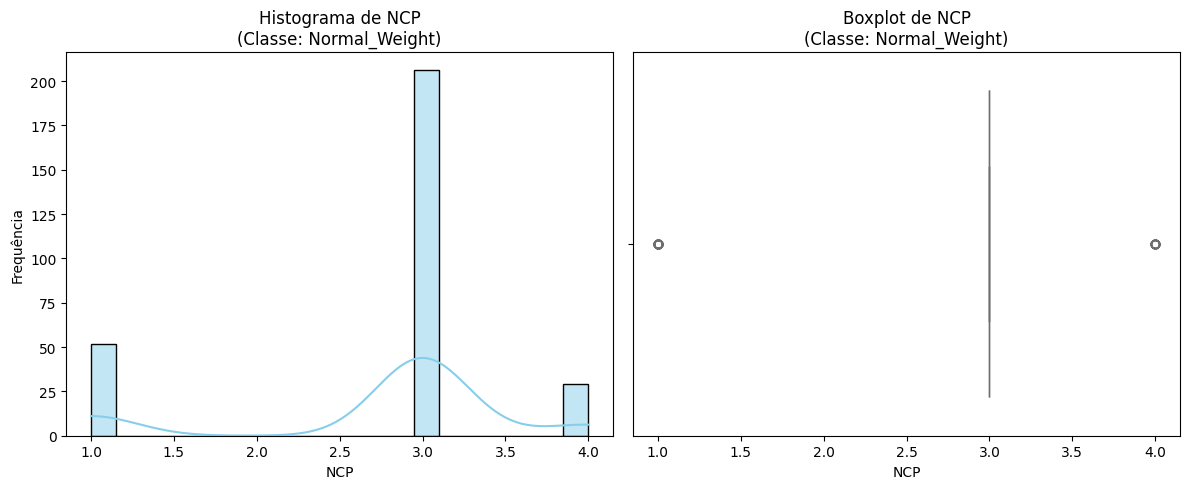

📈 Estatísticas de 'NCP' para a classe 'Normal_Weight':
   Média (μ): 2.74
   Desvio padrão (σ): 0.87
   Assimetria (γ): -1.12
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Obesity_Type_I ---


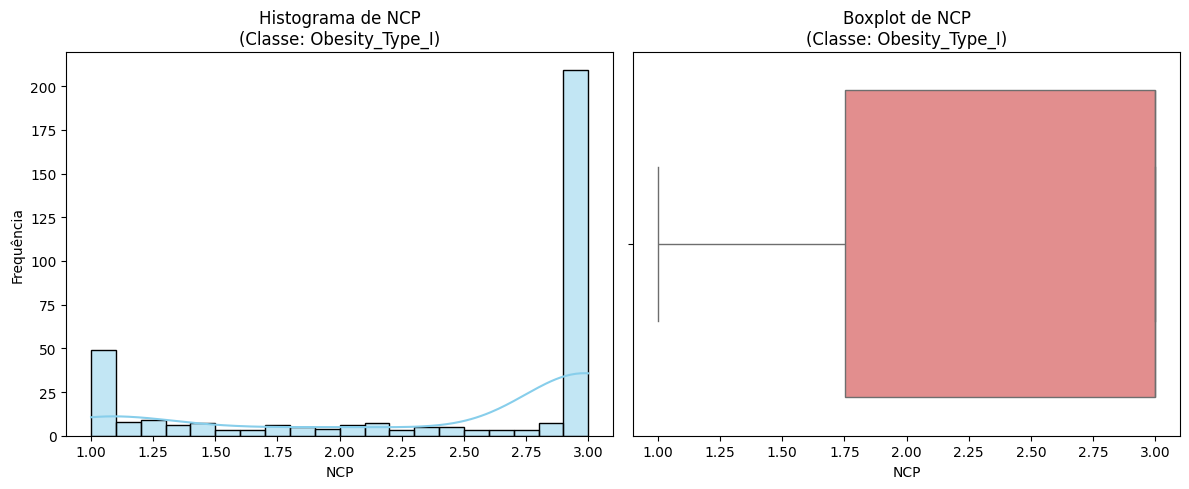

📈 Estatísticas de 'NCP' para a classe 'Obesity_Type_I':
   Média (μ): 2.43
   Desvio padrão (σ): 0.79
   Assimetria (γ): -0.91
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Obesity_Type_II ---


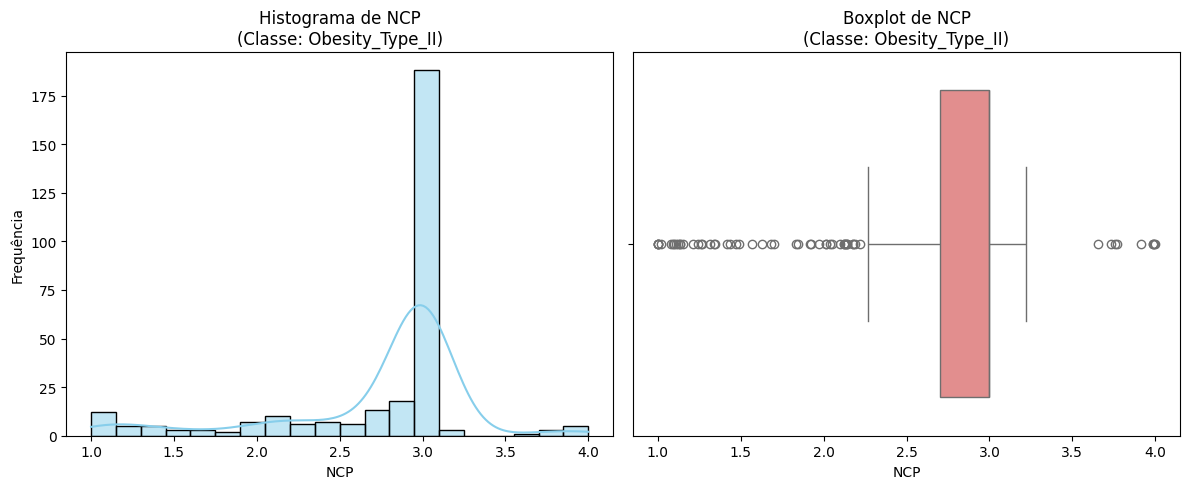

📈 Estatísticas de 'NCP' para a classe 'Obesity_Type_II':
   Média (μ): 2.74
   Desvio padrão (σ): 0.58
   Assimetria (γ): -1.54
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Obesity_Type_III ---


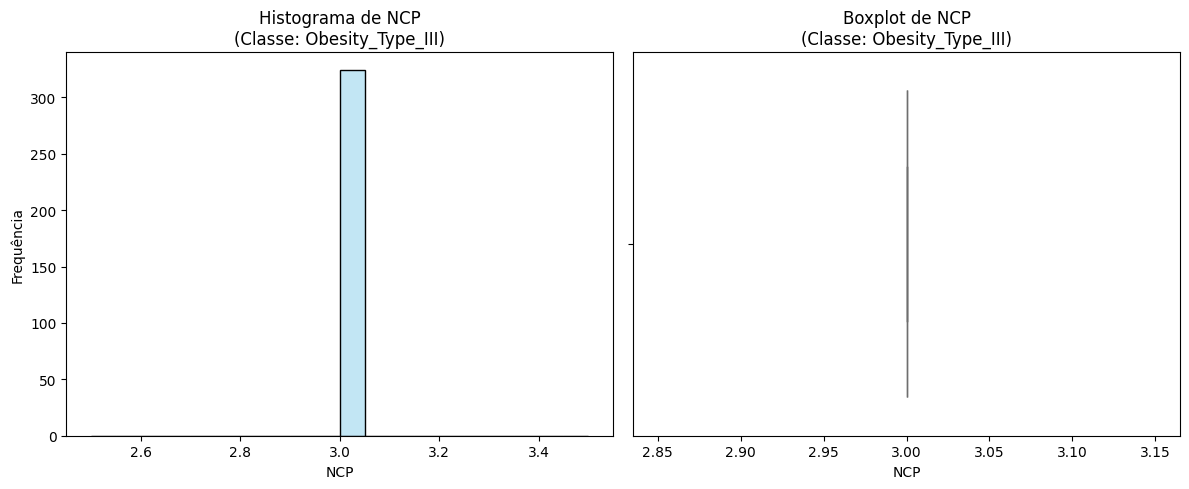

📈 Estatísticas de 'NCP' para a classe 'Obesity_Type_III':
   Média (μ): 3.00
   Desvio padrão (σ): 0.00
   Assimetria (γ): nan
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Overweight_Level_I ---


C:\Users\diego\AppData\Local\Temp\ipykernel_12956\3870966219.py:44: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(subset_data[col].dropna())


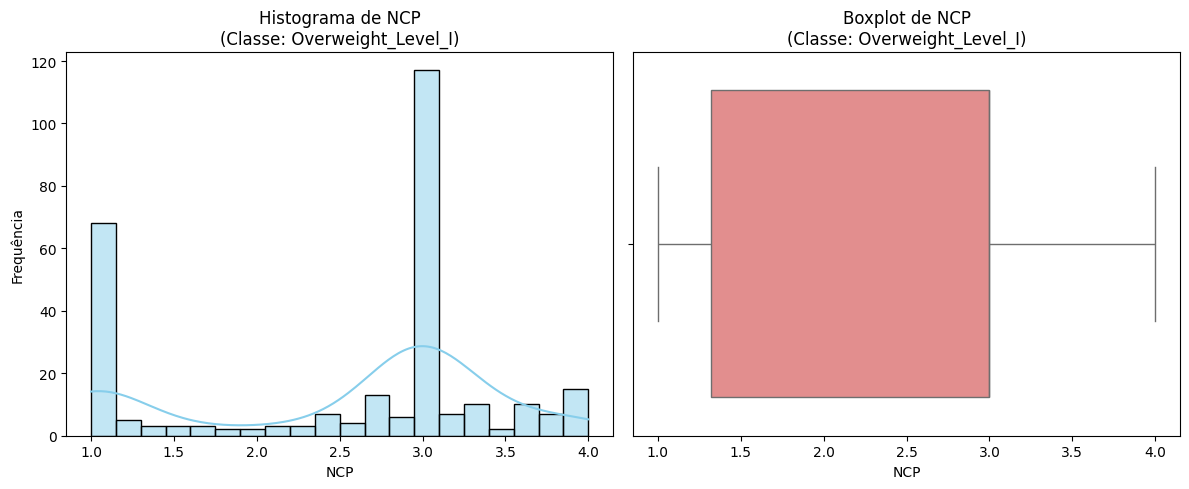

📈 Estatísticas de 'NCP' para a classe 'Overweight_Level_I':
   Média (μ): 2.50
   Desvio padrão (σ): 0.96
   Assimetria (γ): -0.55
--------------------------------------------------

--- Analisando 'NCP' para a Classe: Overweight_Level_II ---


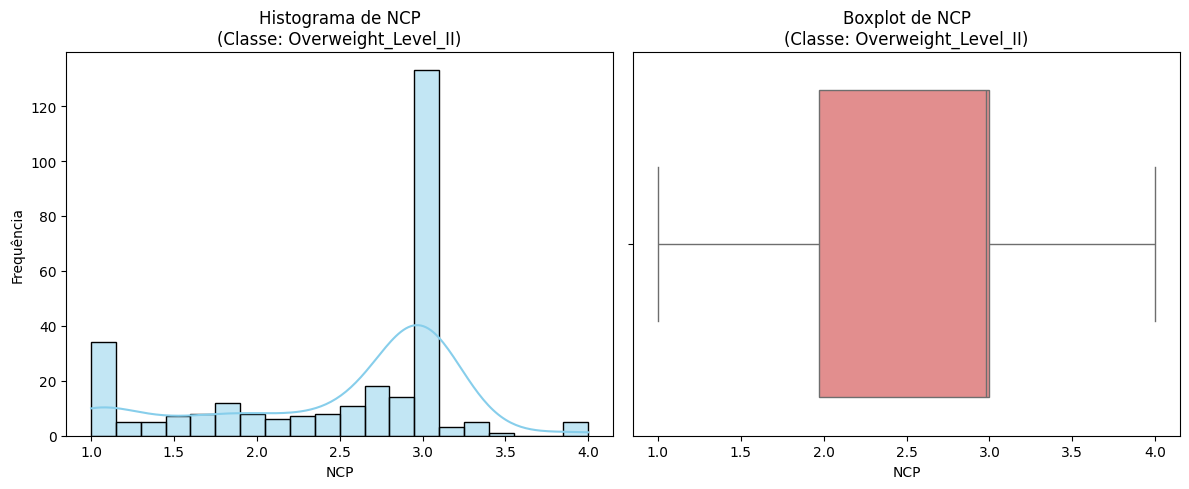

📈 Estatísticas de 'NCP' para a classe 'Overweight_Level_II':
   Média (μ): 2.50
   Desvio padrão (σ): 0.75
   Assimetria (γ): -0.87
--------------------------------------------------


========================= ANÁLISE DA VARIÁVEL: CH2O =========================

--- Analisando 'CH2O' para a Classe: Insufficient_Weight ---


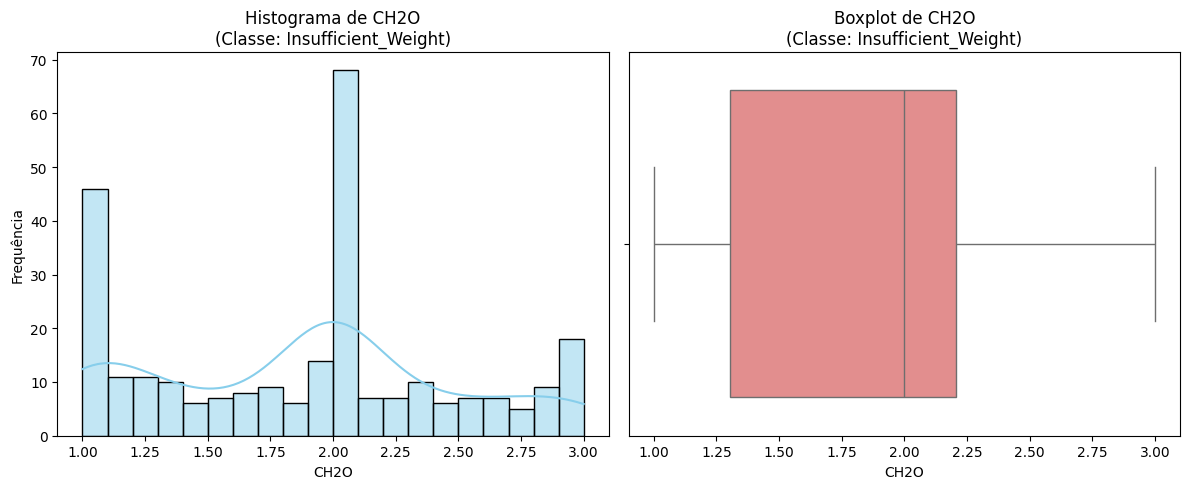

📈 Estatísticas de 'CH2O' para a classe 'Insufficient_Weight':
   Média (μ): 1.87
   Desvio padrão (σ): 0.60
   Assimetria (γ): 0.12
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Normal_Weight ---


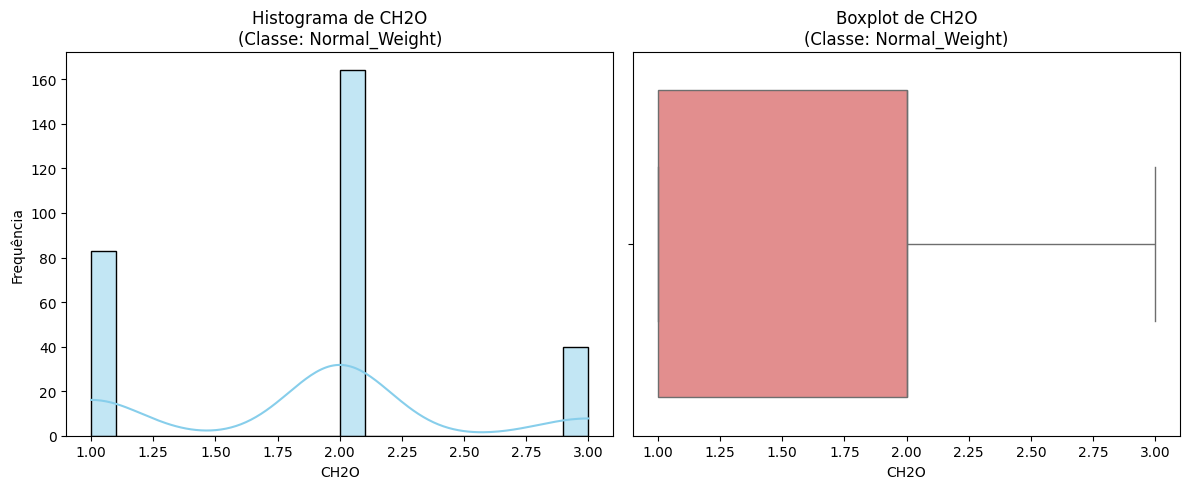

📈 Estatísticas de 'CH2O' para a classe 'Normal_Weight':
   Média (μ): 1.85
   Desvio padrão (σ): 0.64
   Assimetria (γ): 0.14
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Obesity_Type_I ---


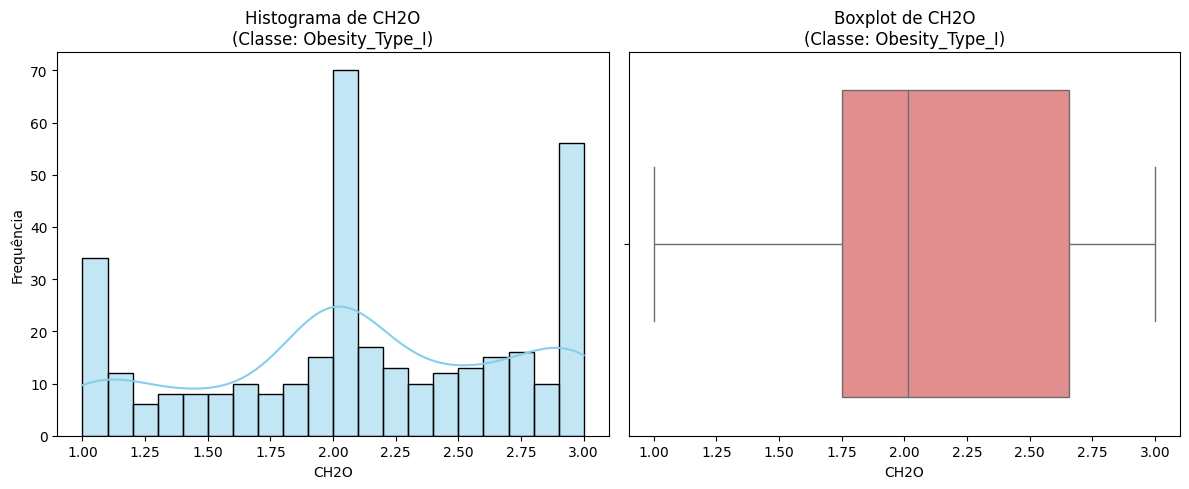

📈 Estatísticas de 'CH2O' para a classe 'Obesity_Type_I':
   Média (μ): 2.11
   Desvio padrão (σ): 0.62
   Assimetria (γ): -0.21
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Obesity_Type_II ---


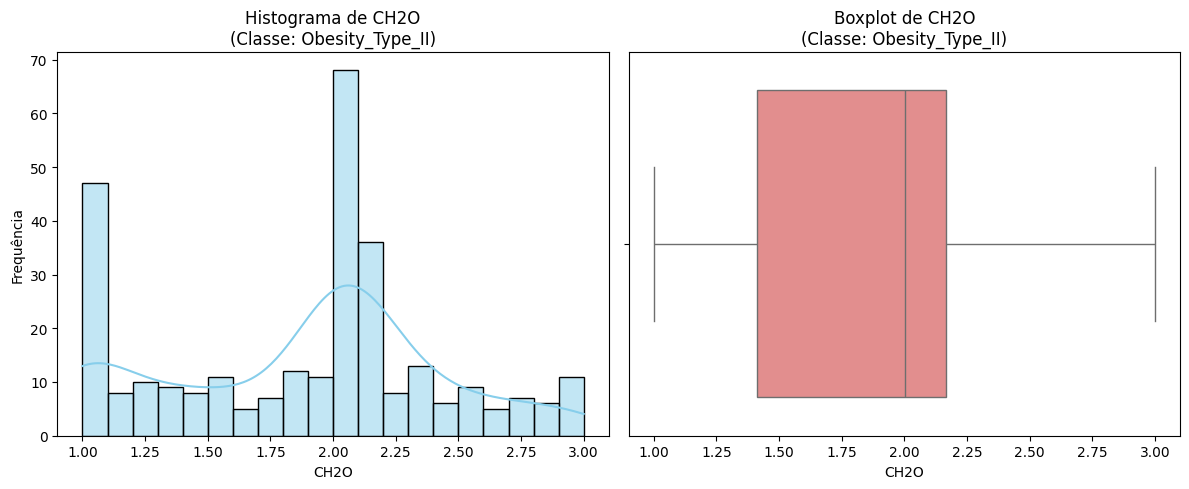

📈 Estatísticas de 'CH2O' para a classe 'Obesity_Type_II':
   Média (μ): 1.88
   Desvio padrão (σ): 0.55
   Assimetria (γ): -0.13
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Obesity_Type_III ---


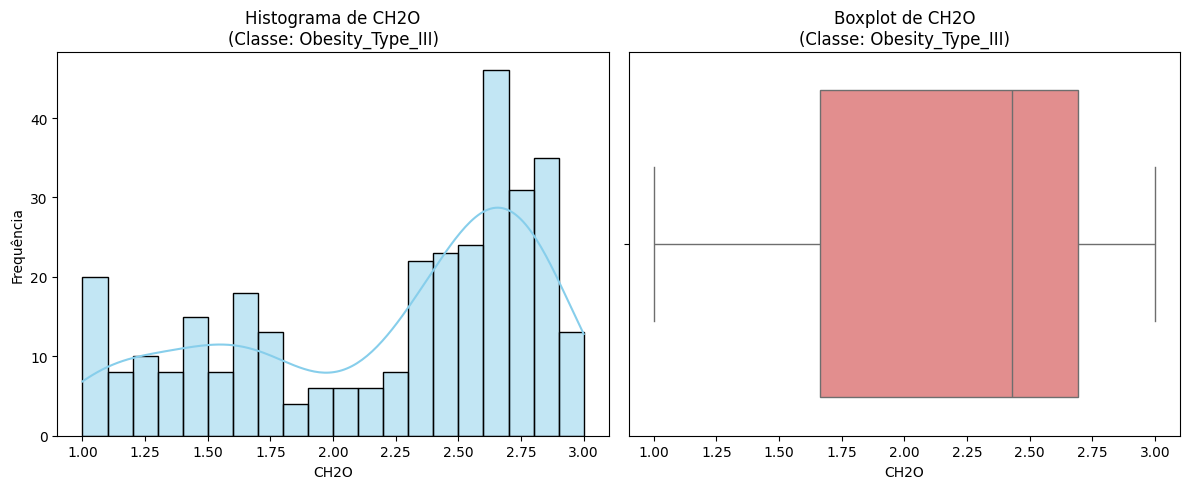

📈 Estatísticas de 'CH2O' para a classe 'Obesity_Type_III':
   Média (μ): 2.21
   Desvio padrão (σ): 0.60
   Assimetria (γ): -0.64
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Overweight_Level_I ---


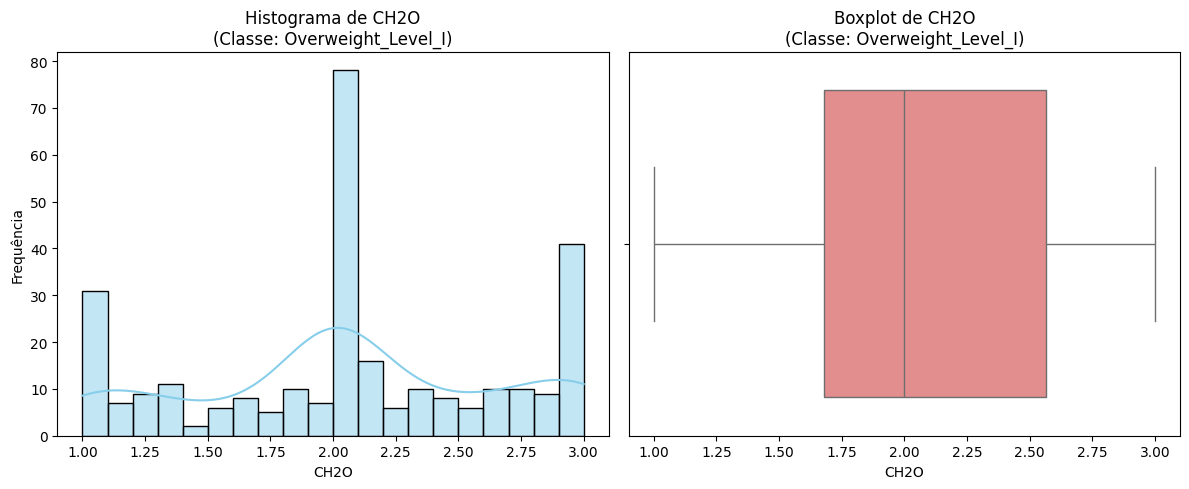

📈 Estatísticas de 'CH2O' para a classe 'Overweight_Level_I':
   Média (μ): 2.06
   Desvio padrão (σ): 0.62
   Assimetria (γ): -0.09
--------------------------------------------------

--- Analisando 'CH2O' para a Classe: Overweight_Level_II ---


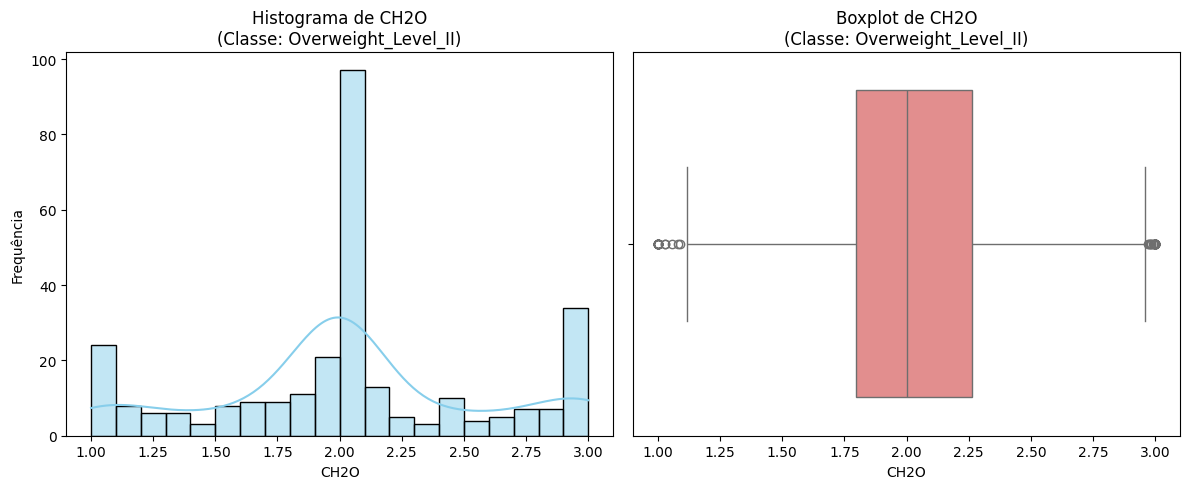

📈 Estatísticas de 'CH2O' para a classe 'Overweight_Level_II':
   Média (μ): 2.03
   Desvio padrão (σ): 0.55
   Assimetria (γ): 0.05
--------------------------------------------------


========================= ANÁLISE DA VARIÁVEL: FAF =========================

--- Analisando 'FAF' para a Classe: Insufficient_Weight ---


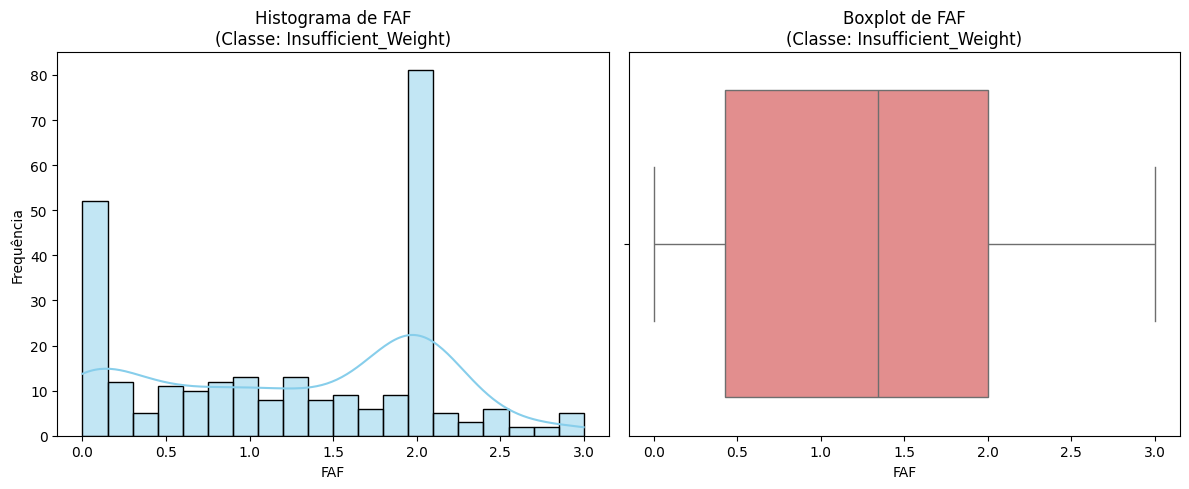

📈 Estatísticas de 'FAF' para a classe 'Insufficient_Weight':
   Média (μ): 1.25
   Desvio padrão (σ): 0.86
   Assimetria (γ): -0.13
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Normal_Weight ---


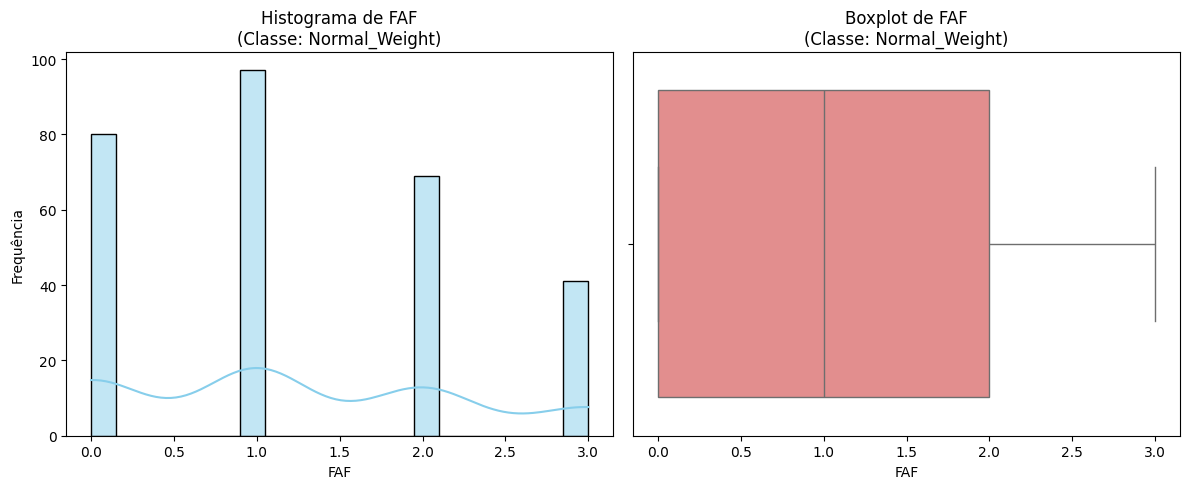

📈 Estatísticas de 'FAF' para a classe 'Normal_Weight':
   Média (μ): 1.25
   Desvio padrão (σ): 1.02
   Assimetria (γ): 0.31
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Obesity_Type_I ---


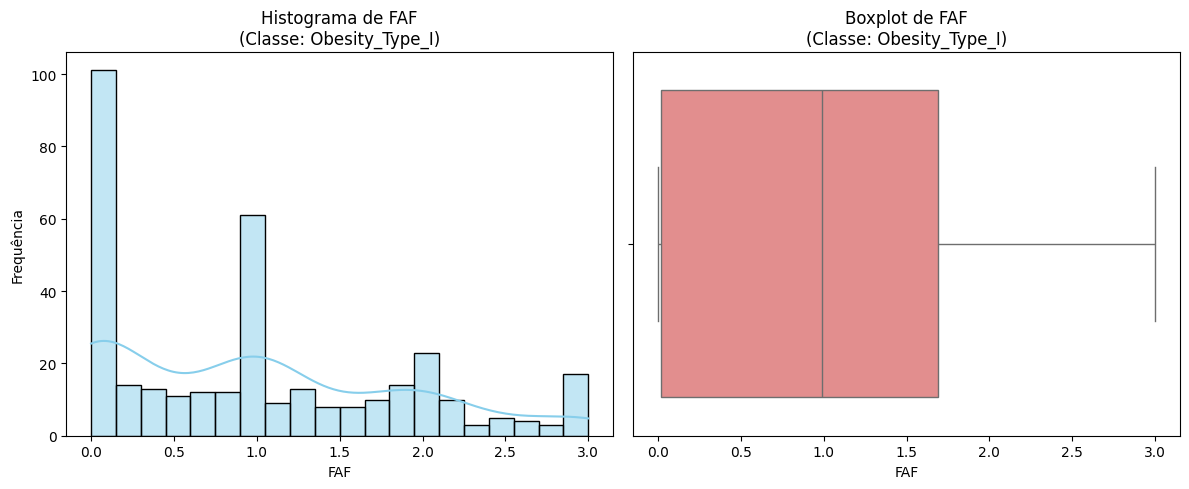

📈 Estatísticas de 'FAF' para a classe 'Obesity_Type_I':
   Média (μ): 0.99
   Desvio padrão (σ): 0.89
   Assimetria (γ): 0.61
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Obesity_Type_II ---


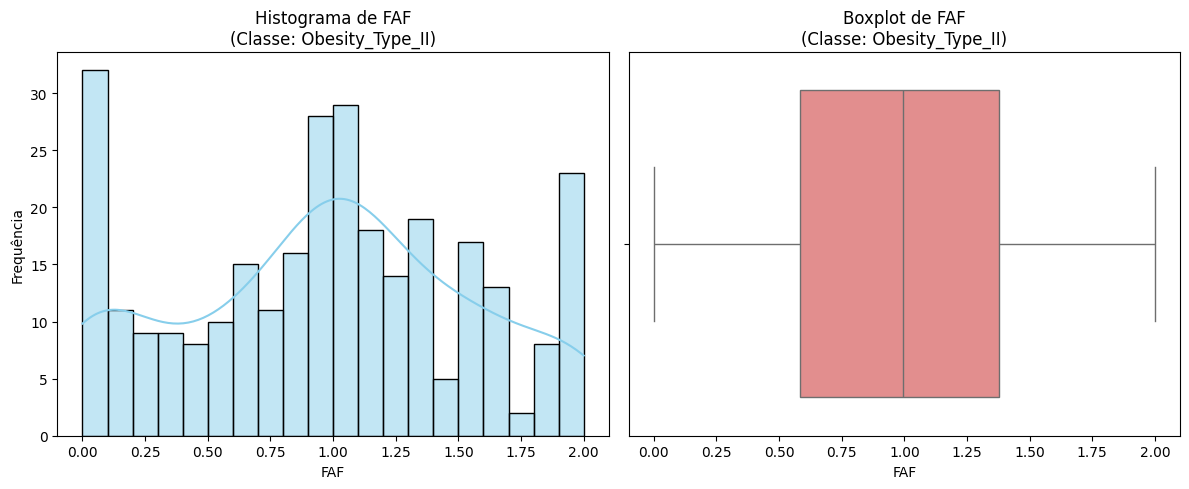

📈 Estatísticas de 'FAF' para a classe 'Obesity_Type_II':
   Média (μ): 0.97
   Desvio padrão (σ): 0.58
   Assimetria (γ): -0.06
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Obesity_Type_III ---


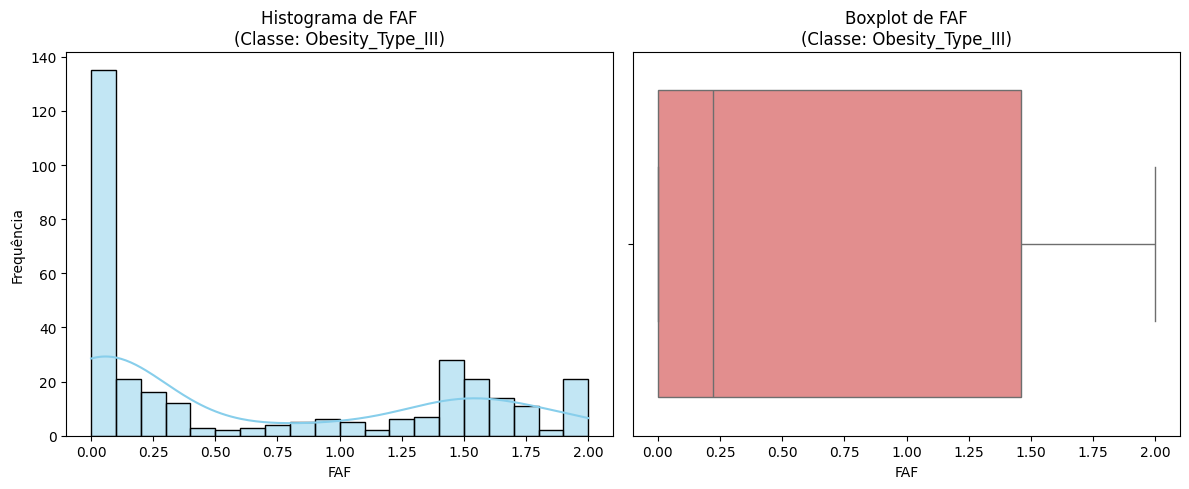

📈 Estatísticas de 'FAF' para a classe 'Obesity_Type_III':
   Média (μ): 0.66
   Desvio padrão (σ): 0.73
   Assimetria (γ): 0.54
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Overweight_Level_I ---


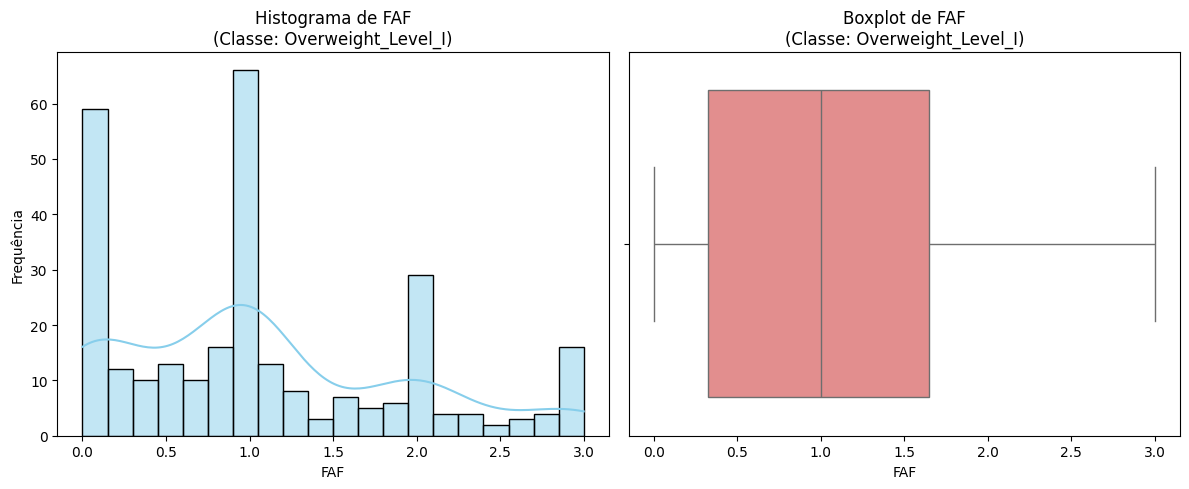

📈 Estatísticas de 'FAF' para a classe 'Overweight_Level_I':
   Média (μ): 1.06
   Desvio padrão (σ): 0.85
   Assimetria (γ): 0.65
--------------------------------------------------

--- Analisando 'FAF' para a Classe: Overweight_Level_II ---


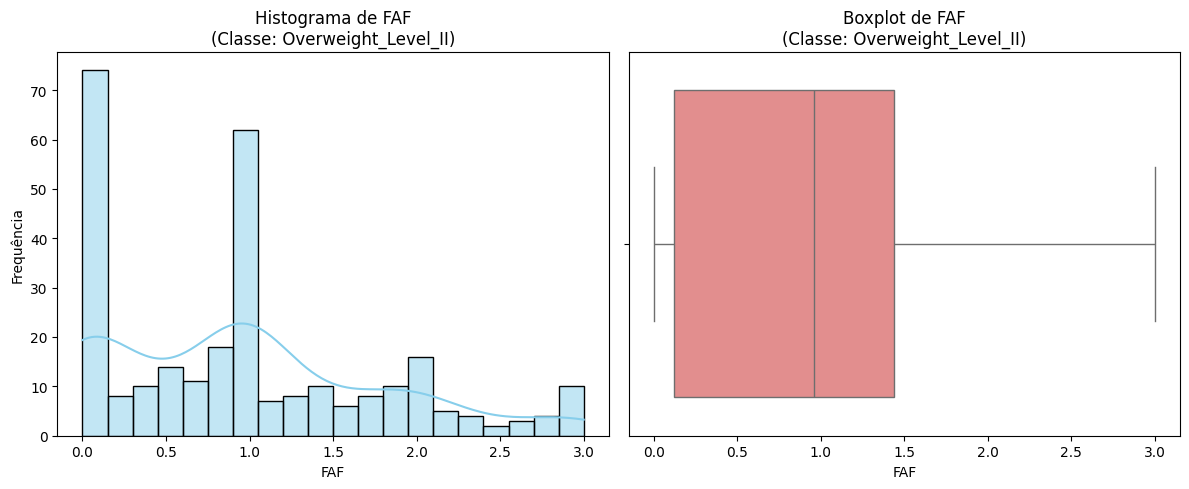

📈 Estatísticas de 'FAF' para a classe 'Overweight_Level_II':
   Média (μ): 0.96
   Desvio padrão (σ): 0.82
   Assimetria (γ): 0.68
--------------------------------------------------


========================= ANÁLISE DA VARIÁVEL: TUE =========================

--- Analisando 'TUE' para a Classe: Insufficient_Weight ---


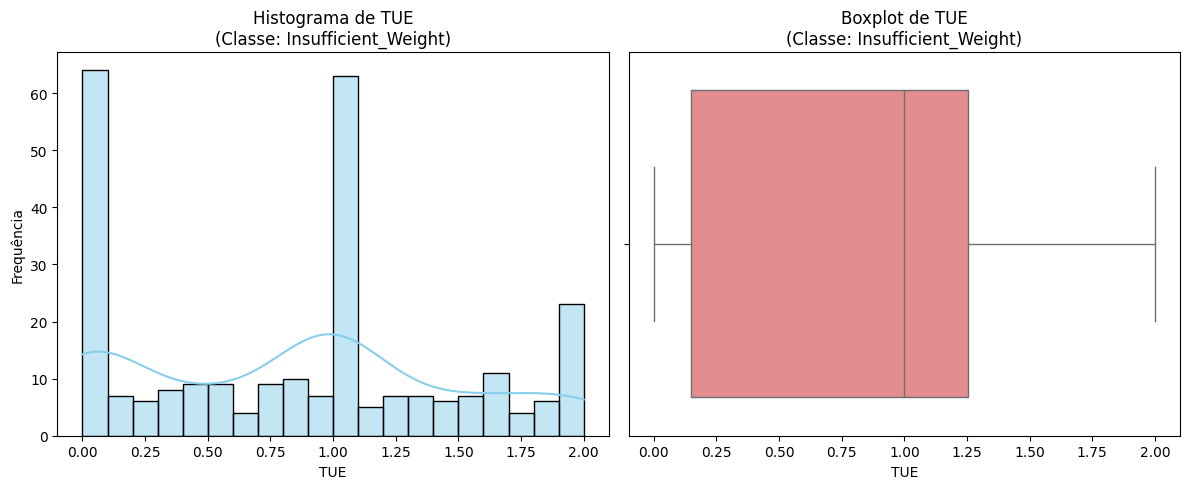

📈 Estatísticas de 'TUE' para a classe 'Insufficient_Weight':
   Média (μ): 0.84
   Desvio padrão (σ): 0.64
   Assimetria (γ): 0.20
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Normal_Weight ---


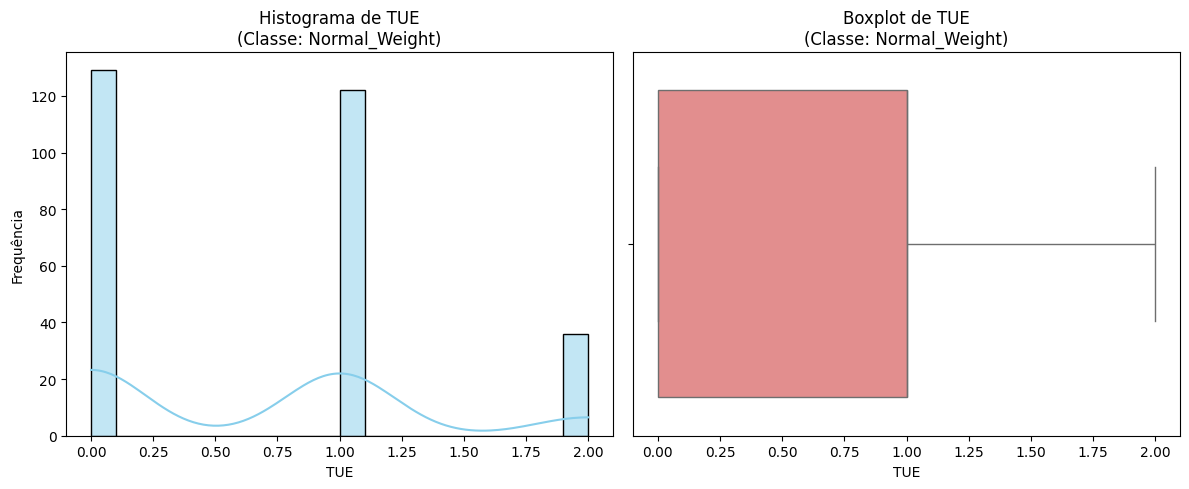

📈 Estatísticas de 'TUE' para a classe 'Normal_Weight':
   Média (μ): 0.68
   Desvio padrão (σ): 0.69
   Assimetria (γ): 0.52
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Obesity_Type_I ---


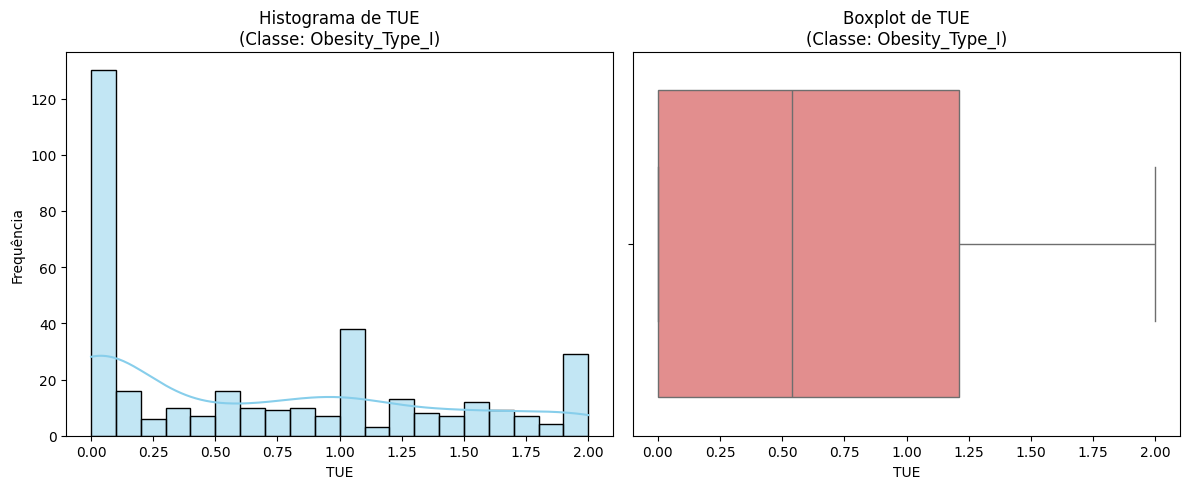

📈 Estatísticas de 'TUE' para a classe 'Obesity_Type_I':
   Média (μ): 0.68
   Desvio padrão (σ): 0.69
   Assimetria (γ): 0.56
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Obesity_Type_II ---


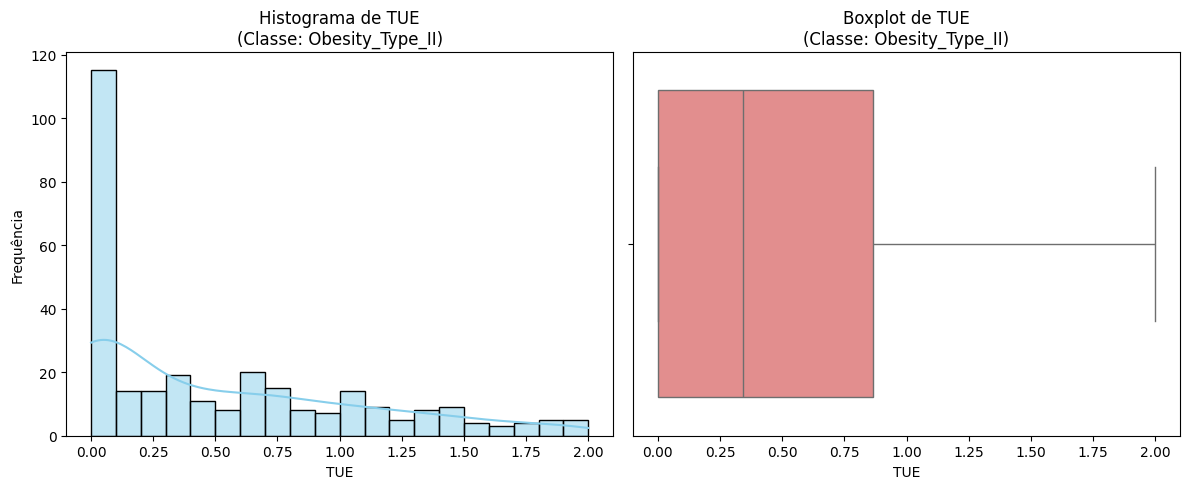

📈 Estatísticas de 'TUE' para a classe 'Obesity_Type_II':
   Média (μ): 0.52
   Desvio padrão (σ): 0.56
   Assimetria (γ): 0.91
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Obesity_Type_III ---


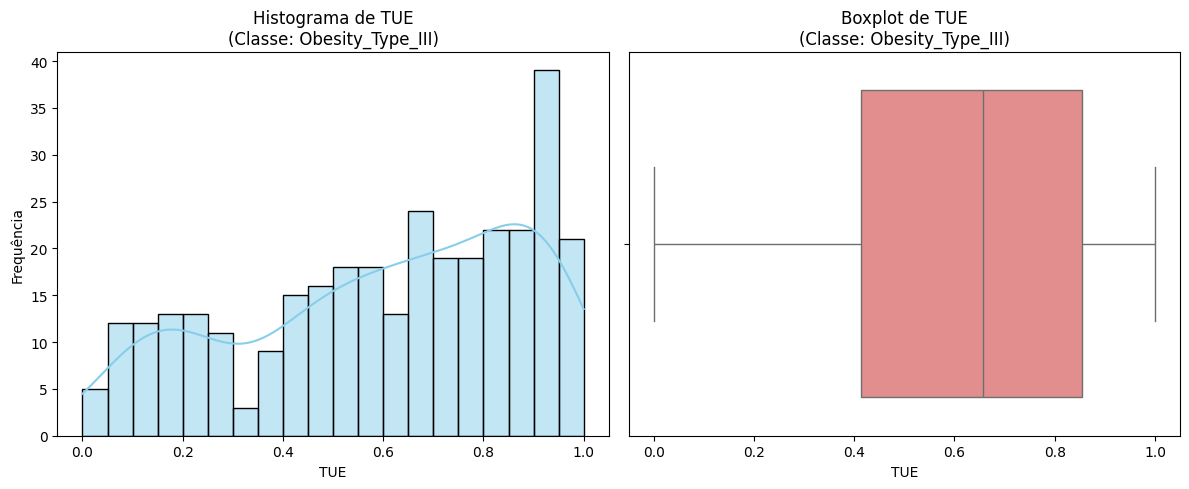

📈 Estatísticas de 'TUE' para a classe 'Obesity_Type_III':
   Média (μ): 0.60
   Desvio padrão (σ): 0.28
   Assimetria (γ): -0.45
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Overweight_Level_I ---


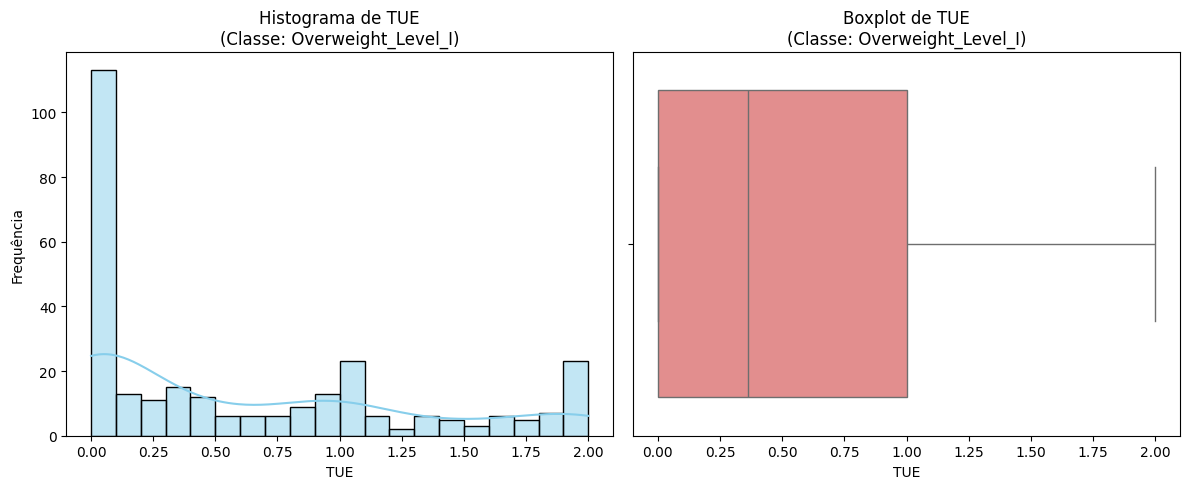

📈 Estatísticas de 'TUE' para a classe 'Overweight_Level_I':
   Média (μ): 0.61
   Desvio padrão (σ): 0.68
   Assimetria (γ): 0.79
--------------------------------------------------

--- Analisando 'TUE' para a Classe: Overweight_Level_II ---


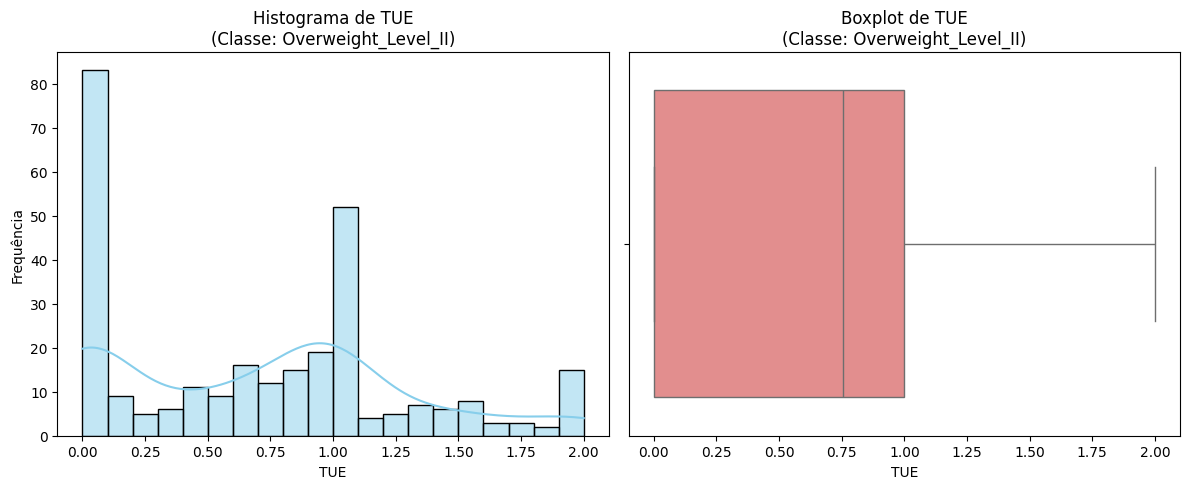

📈 Estatísticas de 'TUE' para a classe 'Overweight_Level_II':
   Média (μ): 0.70
   Desvio padrão (σ): 0.59
   Assimetria (γ): 0.40
--------------------------------------------------


In [ ]:
unique_classes = sorted(data['NObeyesdad'].unique())

for col in numeric_cols:
    
    # Imprime um cabeçalho grande para separar a análise de cada variável
    print(f"\n\n{'='*25} ANÁLISE DA VARIÁVEL: {col.upper()} {'='*25}")

    # 2. LOOP INTERNO: Passa por cada classe de obesidade
    for cls in unique_classes:
        
        # Filtra o DataFrame para obter apenas os dados da classe atual
        subset_data = data[data['NObeyesdad'] == cls]
        
        # Imprime um sub-cabeçalho para a classe que está sendo analisada
        print(f"\n--- Analisando '{col}' para a Classe: {cls} ---")

        # Verifica se há dados para analisar neste subconjunto
        if subset_data[col].dropna().empty:
            print(f"   -> Não há dados disponíveis para a variável '{col}' na classe '{cls}'.")
            continue

        # --- Geração dos Gráficos para o subconjunto ---
        plt.figure(figsize=(12, 5))

        # Subplot 1: Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(subset_data[col], bins=20, kde=True, color='skyblue')
        plt.title(f'Histograma de {col}\n(Classe: {cls})')
        plt.xlabel(col)
        plt.ylabel('Frequência')

        # Subplot 2: Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=subset_data[col], color='lightcoral')
        plt.title(f'Boxplot de {col}\n(Classe: {cls})')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

        # --- Cálculo das Estatísticas para o subconjunto ---
        mean = subset_data[col].mean()
        std = subset_data[col].std()
        skewness = skew(subset_data[col].dropna())

        print(f"Estatísticas de '{col}' para a classe '{cls}':")
        print(f"   Média (μ): {mean:.2f}")
        print(f"   Desvio padrão (σ): {std:.2f}")
        print(f"   Assimetria (γ): {skewness:.2f}")
        print("-" * 50)


# Tabela - Analise Monovariada Condicional

In [40]:
for col in numeric_cols:
    
    print(f"\n--- Tabela de Estatísticas para a Variável: {col} ---")
    
    # Executa o groupby e agg apenas para a coluna atual
    tabela_preditor = data.groupby('NObeyesdad')[[col]].agg(
        ['mean', 'std', lambda x: skew(x.dropna())]
    )
    
    # Renomeia as colunas para ficarem mais limpas
    tabela_preditor.columns = ['Média (μ)', 'Desvio Padrão (σ)', 'Assimetria (γ)']
    
    # Exibe a tabela formatada
    print(tabela_preditor)
    print("-" * 50)


--- Tabela de Estatísticas para a Variável: Age ---
                     Média (μ)  Desvio Padrão (σ)  Assimetria (γ)
NObeyesdad                                                       
Insufficient_Weight  19.783237           2.669511        2.758561
Normal_Weight        21.738676           5.096756        3.134792
Obesity_Type_I       25.884941           7.755700        1.024367
Obesity_Type_II      28.233785           4.868199        0.820858
Obesity_Type_III     23.495554           2.764324       -0.517940
Overweight_Level_I   23.417674           6.125076        1.690787
Overweight_Level_II  26.996981           8.061061        1.183702
--------------------------------------------------

--- Tabela de Estatísticas para a Variável: Height ---
                     Média (μ)  Desvio Padrão (σ)  Assimetria (γ)
NObeyesdad                                                       
Insufficient_Weight   1.691117           0.099687       -0.100568
Normal_Weight         1.676585           0.09452

C:\Users\diego\AppData\Local\Temp\ipykernel_12956\1743422225.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ['mean', 'std', lambda x: skew(x.dropna())]
C:\Users\diego\AppData\Local\Temp\ipykernel_12956\1743422225.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ['mean', 'std', lambda x: skew(x.dropna())]


# Análise bivariada

In [4]:
# carrega-se o dataset novamente
df = pd.read_csv("ObesityDataSet.csv")

# converte as colunas que são categóricas para valores numéricos
cat_cols = ['Gender', 'FAVC', 'CAEC', 'CALC', 'SCC', 'MTRANS']
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# selecionamos apenas as colunas numéricas
num_cols = df_encoded.select_dtypes(include='number').columns

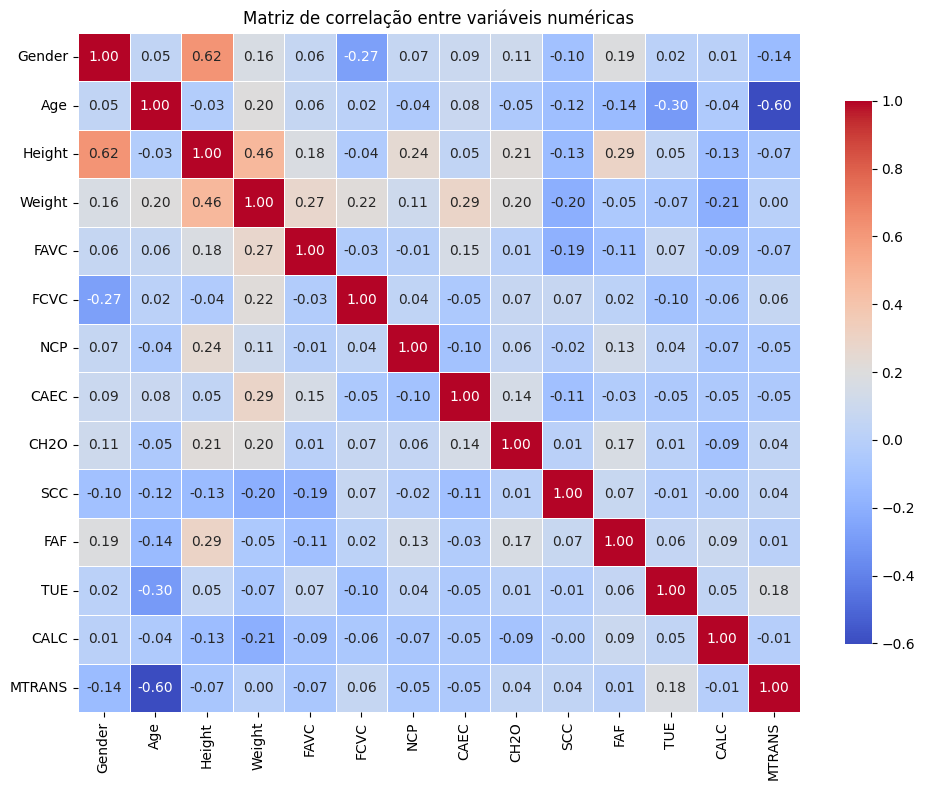


Top 10 correlações mais fortes:

Gender  Gender    1.000000
        Height    0.618466
Age     MTRANS   -0.601945
Height  Weight    0.463136
Age     TUE      -0.296931
Height  FAF       0.294709
Weight  CAEC      0.287493
Gender  FCVC     -0.274505
Weight  FAVC      0.272300
Height  NCP       0.243672
dtype: float64


In [8]:

# matriz de correlação
corr_matrix = df_encoded[num_cols].corr()


# Plot da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Matriz de correlação entre variáveis numéricas")
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()

# Identificando as correlações mais fortes
corr_pairs = (
    corr_matrix.unstack()
    .drop_duplicates()
    .sort_values(key=lambda x: abs(x), ascending=False)
)
print("\nTop 10 correlações mais fortes:\n")
print(corr_pairs.head(10))


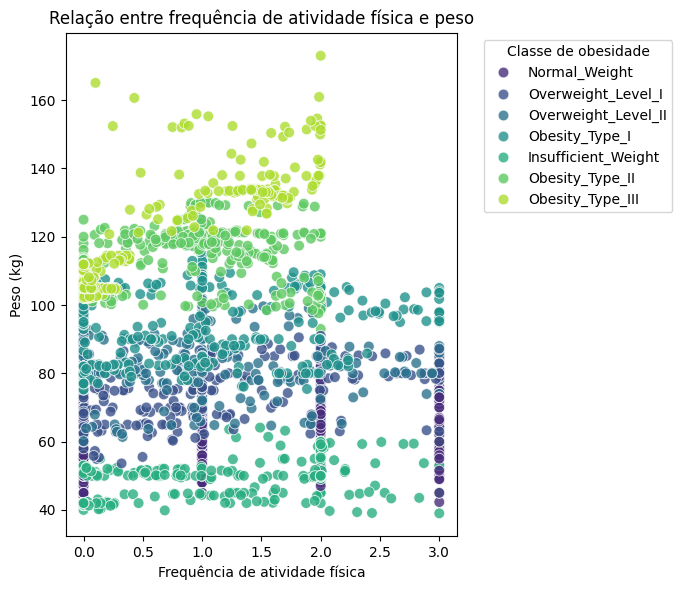

In [ ]:
# Scatter plot: FAF × Weight
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x="FAF", y="Weight", hue="NObeyesdad", palette="viridis", s=60, alpha=0.8)
plt.title("Relação entre frequência de atividade física e peso")
plt.xlabel("Frequência de atividade física")
plt.ylabel("Peso (kg)")
plt.legend(title="Classe de obesidade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("scatter_faf_weight.png", dpi=300)
plt.show()

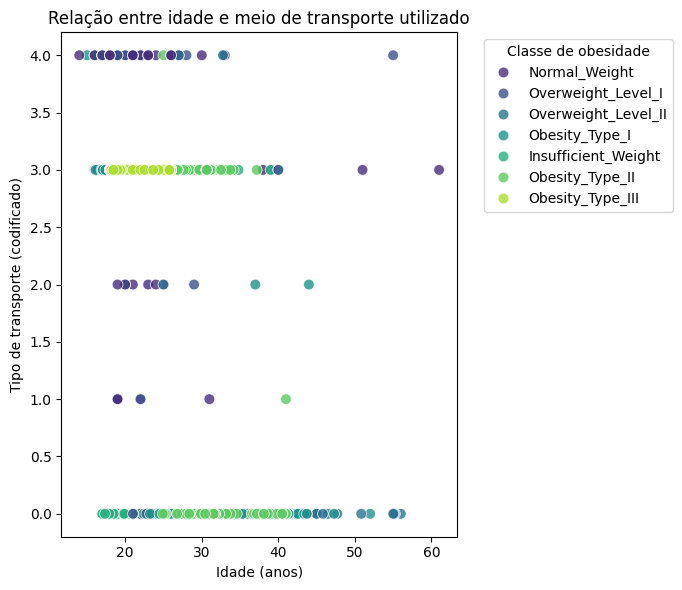


Categorias de transporte (códigos correspondentes):
0: Automobile
1: Bike
2: Motorbike
3: Public_Transportation
4: Walking


In [ ]:
# transformação da variável categórica MTRANS em numérica
if df['MTRANS'].dtype == 'object':
    df['MTRANS_code'] = df['MTRANS'].astype('category').cat.codes
else:
    df['MTRANS_code'] = df['MTRANS']


# Gráfico 

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df,
    x="Age",
    y="MTRANS_code",
    hue="NObeyesdad",         
    palette="viridis",
    s=60,
    alpha=0.8
)

plt.title("Relação entre idade e meio de transporte utilizado")
plt.xlabel("Idade (anos)")
plt.ylabel("Tipo de transporte (codificado)")
plt.legend(title="Classe de obesidade", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("scatter_age_mtrans.png", dpi=300)
plt.show()

# Mostra as categorias de MTRANS
if 'MTRANS' in df.columns:
    categorias = df['MTRANS'].astype('category').cat.categories
    print("\nCategorias de transporte (códigos correspondentes):")
    for i, cat in enumerate(categorias):
        print(f"{i}: {cat}")


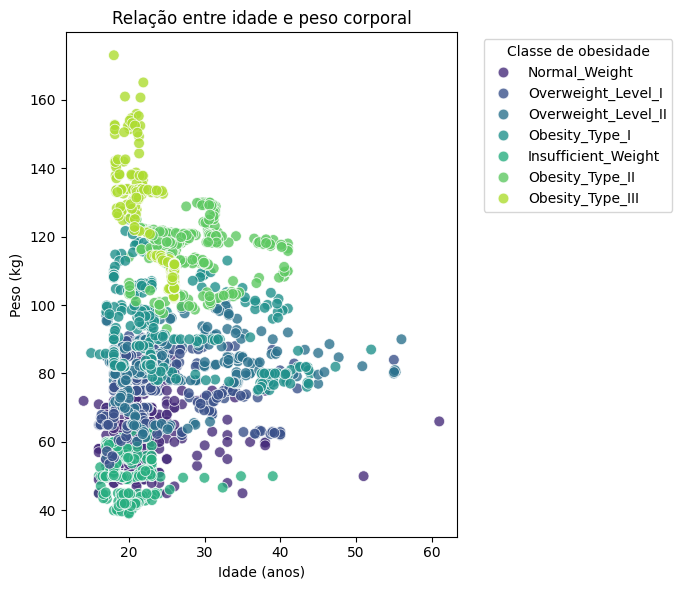

In [14]:

# Gráfico 

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df,
    x="Age",
    y="Weight",
    hue="NObeyesdad",        # ajuste o nome caso seja diferente no seu dataset
    palette="viridis",
    s=60,
    alpha=0.8
)

plt.title("Relação entre idade e peso corporal")
plt.xlabel("Idade (anos)")
plt.ylabel("Peso (kg)")
plt.legend(title="Classe de obesidade", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("scatter_age_weight.png", dpi=300)
plt.show()


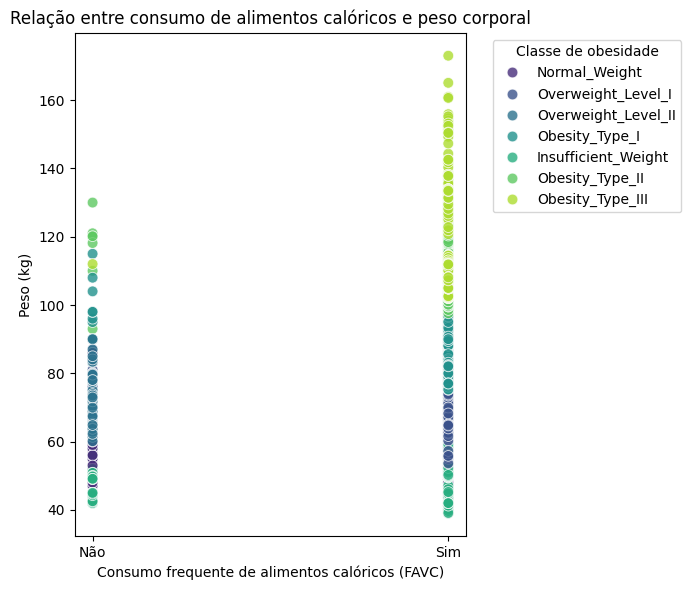

In [22]:
# transformar FAVC em código numérico
if df['FAVC'].dtype == 'object':
    df['FAVC_code'] = df['FAVC'].astype('category').cat.codes
else:
    df['FAVC_code'] = df['FAVC']

# gráfico

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df,
    x="FAVC_code",     # 0 = não, 1 = sim
    y="Weight",
    hue="NObeyesdad",    
    palette="viridis",
    s=60,
    alpha=0.8
)

plt.title("Relação entre consumo de alimentos calóricos e peso corporal")
plt.xlabel("Consumo frequente de alimentos calóricos (FAVC)")
plt.ylabel("Peso (kg)")
plt.xticks([0, 1], ["Não", "Sim"])
plt.legend(title="Classe de obesidade", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("scatter_favc_weight.png", dpi=300)
plt.show()
